# 针对每个智能体进行调优

## 1. 景点探索智能体

In [2]:
from supervisor_agent import llm,tour_search,create_react_agent


In [5]:

# 景点搜索智能体
tour_search_agent = create_react_agent(
    model=llm,
    prompt=f"""
        角色定位：
        你是一个搜索景点信息和景点攻略的智能体。

        核心能力：
        - 精准理解用户的旅游需求和偏好
        - 熟练调用`tour_search`、`tour_strategy`工具进行信息检索
        - 整合并优化景点介绍和旅游攻略内容，保证景点列表和攻略列表能够满足用户的需要

        工作流程：
        1. 分析用户需求（目的地、旅游偏好、时间安排等）
        2. 调用`tour_search`工具检索相关信息，你可以调用多次工具，以便于景点列表和攻略列表能够满足用户的需要
        3. 筛选并整理最相关、最有价值的内容
        4. 按规定格式输出结果

        你最后的输出需要满足以下要求：
        【景点介绍】
        - 景点名称：[具体名称]
        - 基础信息：[地理位置、开放时间、门票价格等]
        - 景点特色：[核心亮点、历史文化背景、独特体验等]
        - 景点攻略：[景点攻略]
        

        质量要求：
        1. 信息准确性：确保所有信息真实可靠、是从检索到的网页中总结出来的，而不是根据自身的知识
        2. 内容实用性：提供切实可行的建议和攻略
        3. 表述清晰性：语言简洁明了，重点突出，便于用户快速获取关键信息
        4. 你的任务是：根据用户的需求，进行景点探索、景点补充、景点更新；攻略的探索、更新，最终形成景点列表和攻略列表，以便于形成规划智能体进行景点规划，不需要你对景点进行规划
        5. 最后返回的内容，要是规定格式。
    """,
    tools=[tour_search],
    name="tour_search_agent",
)


In [ ]:

tour_search_result = tour_search_agent.invoke({"messages": [{"role": "user", "content": "我想要去北京旅游三天，带小孩"}]})

print(tour_search_result["messages"][-1].content)

In [12]:
tour_search_agent_result = tour_search_result["messages"][-1].content
print(tour_search_agent_result)

根据搜索结果，我为您整理了北京三天亲子游的详细景点介绍和攻略：

## 【景点介绍】

### 第一天：历史文化之旅

**- 景点名称：天安门广场**
- 基础信息：位于北京市中心，全天开放，免费参观，需提前在"天安门广场预约"小程序预约
- 景点特色：中华人民共和国的象征，每天举行庄严的升旗仪式，是感受爱国主义教育的绝佳场所
- 景点攻略：建议提前1-2小时到达占好位置观看升旗仪式，让孩子感受国家的庄严与伟大

**- 景点名称：故宫博物院**
- 基础信息：开放时间8:30-17:00，需提前7天在"故宫博物馆"微信小程序预约，成人票60元，学生票20元
- 景点特色：世界最大的古代建筑群，明清两代皇家宫殿，拥有丰富的历史文物和精美建筑
- 景点攻略：租用儿童专属讲解器，重点参观太和殿、御花园、钟表馆和珍宝馆，用"寻宝游戏"方式让孩子找到龙椅、"正大光明"匾等标志性文物

### 第二天：自然动物之旅

**- 景点名称：北京动物园**
- 基础信息：开放时间7:30-18:00，成人票15元，学生票8元，位于西城区西直门外大街
- 景点特色：汇聚世界各地珍稀动物，设有大熊猫馆、海洋馆等特色场馆，是孩子们的最爱
- 景点攻略：可提前在"北京动物园"公众号查询动物展示时间，重点观看大熊猫、长颈鹿表演，参与动物科普活动

**- 景点名称：颐和园**
- 基础信息：开放时间6:30-18:00，成人票30元，学生票15元，位于海淀区新建宫门路19号
- 景点特色：中国古代皇家园林瑰宝，以昆明湖、万寿山为主体，拥有精美的长廊彩绘
- 景点攻略：乘坐游船游览昆明湖，参观长廊欣赏彩绘，让孩子在长廊间奔跑嬉戏，体验皇家园林之美

### 第三天：科技探索之旅

**- 景点名称：中国科技馆**
- 基础信息：开放时间9:30-17:00，成人票30元，学生票20元，位于朝阳区北辰东路5号
- 景点特色：设有儿童科学乐园、科技互动展览，激发孩子对科学的兴趣和探索欲
- 景点攻略：重点体验"儿童科学乐园"，参与"水循环"、"光影魔法"等互动实验，让孩子在玩乐中学习科学知识

**- 景点名称：奥林匹克森林公园**
- 基础信息：全天开放，免费参观，位于朝阳区北五环林萃路
- 景点特色：环境优美的大型城市公园，拥有丰富的儿童游乐设施和广阔草坪
- 景点攻略：适合家庭野餐和户外活

In [14]:
from supervisor_agent import llm,tour_search,create_react_agent,get_geocodes,search_nearby,get_distance
day_plan_sys_prompt = """
**角色：智能行程规划专家**

**核心任务：**
基于用户的旅游意图、景点信息和景点间驾车时间，为用户规划一个合理、高效、个性化的多日游览行程。

**规划原则：**
1. **用户意图优先**：根据用户的兴趣偏好、出行人群特点、特殊需求来选择和排序景点
2. **交通效率**：利用景点间驾车时间数据，将距离近的景点安排在同一天
3. **行程节奏**：根据用户偏好和出行人群调整每日游览强度（轻松/适中/紧凑）
4. **逻辑顺序**：每日行程形成顺畅路线，如有指定起点，第一天必须从该点出发
5. **完整覆盖**：尽量安排所有提供的核心景点，无法安排的需说明原因

**输入信息：**
- 用户意图分析（包含：目标城市、游玩天数、出行人群、兴趣标签、特殊需求、起始点等）
- 景点信息列表（包含：景点名称、描述、标签等）
- 景点间驾车时间数据

**输出格式：**
请用自然语言输出行程规划，包含以下内容：

1. **行程概览**
   - 总天数、整体节奏、起始点说明

2. **每日行程安排**
   - 第X天：[主题/区域]
   - 游览顺序：景点1 → 景点2 → 景点3...
   - 时间安排：各景点建议游览时长、景点间交通时间
   - 安排理由：说明为何如此安排，如何符合用户需求

3. **特别说明**
   - 未能安排的景点及原因（如有）
   - 其他注意事项

**重要限制：**
- 只使用输入数据中提供的景点，不添加新景点
- 严格使用给定的驾车时间数据
- 行程安排要符合用户的具体需求和偏好

**示例输出风格：**
"根据您的需求，我为您规划了3天的南京之旅，整体节奏轻松舒适，从您入住的南京市中心酒店X出发。

第1天：历史文化深度游
路线：南京市中心酒店X → 总统府（2.5小时）→ 玄武湖（2小时）
- 早上从酒店出发，驾车10分钟到达总统府，深入了解中国近代历史
- 中午在附近用餐后，驾车15分钟前往玄武湖休闲漫步
- 安排理由：首日选择历史文化景点，符合您的兴趣偏好，景点间距离近，不会太疲劳

第2天：秦淮风情美食之旅..."
"""




## 2. 行程规划智能体

In [24]:
# 行程规划智能体
day_plan_agent = create_react_agent(
    model=llm,
    prompt=f"""你是一个专业的旅行行程规划助手，擅长利用高德地图API为用户提供全面的旅行规划服务。

{day_plan_sys_prompt}

你可以：
1. 通过get_geocodes_tool查询任何地址的精确经纬度坐标，支持批量查询多个地点
2. 通过get_distance_tool计算多个景点之间的驾车距离和所需时间，帮助用户合理安排游览顺序


当用户提供地点信息时，你会主动分析并推荐最合理的出行方案。对于多个景点，你会考虑距离、交通便利性和游览时间，提供最优的游览顺序和交通方式。
此外，为了方便其他智能体接受数据，你会在景点旁边添加该景点的经纬，度格式为：景点名称（经纬度：经度，纬度），例如：故宫（经纬度：116.397128,39.916527）
请根据用户的需求，灵活运用这些工具，提供专业、贴心的旅行规划建议。
    """,
    tools=[get_geocodes,get_distance],
    name="day_plan_agent"
)


In [25]:
day_plan_result = day_plan_agent.invoke({"messages": [{"role": "user", "content": tour_search_agent_result}]})

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取北京市海淀区新建宫门路19号颐和园的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


In [26]:
day_plan_result

{'messages': [HumanMessage(content='根据搜索结果，我为您整理了北京三天亲子游的详细景点介绍和攻略：\n\n## 【景点介绍】\n\n### 第一天：历史文化之旅\n\n**- 景点名称：天安门广场**\n- 基础信息：位于北京市中心，全天开放，免费参观，需提前在"天安门广场预约"小程序预约\n- 景点特色：中华人民共和国的象征，每天举行庄严的升旗仪式，是感受爱国主义教育的绝佳场所\n- 景点攻略：建议提前1-2小时到达占好位置观看升旗仪式，让孩子感受国家的庄严与伟大\n\n**- 景点名称：故宫博物院**\n- 基础信息：开放时间8:30-17:00，需提前7天在"故宫博物馆"微信小程序预约，成人票60元，学生票20元\n- 景点特色：世界最大的古代建筑群，明清两代皇家宫殿，拥有丰富的历史文物和精美建筑\n- 景点攻略：租用儿童专属讲解器，重点参观太和殿、御花园、钟表馆和珍宝馆，用"寻宝游戏"方式让孩子找到龙椅、"正大光明"匾等标志性文物\n\n### 第二天：自然动物之旅\n\n**- 景点名称：北京动物园**\n- 基础信息：开放时间7:30-18:00，成人票15元，学生票8元，位于西城区西直门外大街\n- 景点特色：汇聚世界各地珍稀动物，设有大熊猫馆、海洋馆等特色场馆，是孩子们的最爱\n- 景点攻略：可提前在"北京动物园"公众号查询动物展示时间，重点观看大熊猫、长颈鹿表演，参与动物科普活动\n\n**- 景点名称：颐和园**\n- 基础信息：开放时间6:30-18:00，成人票30元，学生票15元，位于海淀区新建宫门路19号\n- 景点特色：中国古代皇家园林瑰宝，以昆明湖、万寿山为主体，拥有精美的长廊彩绘\n- 景点攻略：乘坐游船游览昆明湖，参观长廊欣赏彩绘，让孩子在长廊间奔跑嬉戏，体验皇家园林之美\n\n### 第三天：科技探索之旅\n\n**- 景点名称：中国科技馆**\n- 基础信息：开放时间9:30-17:00，成人票30元，学生票20元，位于朝阳区北辰东路5号\n- 景点特色：设有儿童科学乐园、科技互动展览，激发孩子对科学的兴趣和探索欲\n- 景点攻略：重点体验"儿童科学乐园"，参与"水循环"、"光影魔法"等互动实验，让孩子在玩乐中学习科学知识\n\n**- 景点名称：奥林匹克森林公园**\n- 基础信息：全天开

In [27]:
for i in day_plan_result["messages"]:
    print(i.content)

根据搜索结果，我为您整理了北京三天亲子游的详细景点介绍和攻略：

## 【景点介绍】

### 第一天：历史文化之旅

**- 景点名称：天安门广场**
- 基础信息：位于北京市中心，全天开放，免费参观，需提前在"天安门广场预约"小程序预约
- 景点特色：中华人民共和国的象征，每天举行庄严的升旗仪式，是感受爱国主义教育的绝佳场所
- 景点攻略：建议提前1-2小时到达占好位置观看升旗仪式，让孩子感受国家的庄严与伟大

**- 景点名称：故宫博物院**
- 基础信息：开放时间8:30-17:00，需提前7天在"故宫博物馆"微信小程序预约，成人票60元，学生票20元
- 景点特色：世界最大的古代建筑群，明清两代皇家宫殿，拥有丰富的历史文物和精美建筑
- 景点攻略：租用儿童专属讲解器，重点参观太和殿、御花园、钟表馆和珍宝馆，用"寻宝游戏"方式让孩子找到龙椅、"正大光明"匾等标志性文物

### 第二天：自然动物之旅

**- 景点名称：北京动物园**
- 基础信息：开放时间7:30-18:00，成人票15元，学生票8元，位于西城区西直门外大街
- 景点特色：汇聚世界各地珍稀动物，设有大熊猫馆、海洋馆等特色场馆，是孩子们的最爱
- 景点攻略：可提前在"北京动物园"公众号查询动物展示时间，重点观看大熊猫、长颈鹿表演，参与动物科普活动

**- 景点名称：颐和园**
- 基础信息：开放时间6:30-18:00，成人票30元，学生票15元，位于海淀区新建宫门路19号
- 景点特色：中国古代皇家园林瑰宝，以昆明湖、万寿山为主体，拥有精美的长廊彩绘
- 景点攻略：乘坐游船游览昆明湖，参观长廊欣赏彩绘，让孩子在长廊间奔跑嬉戏，体验皇家园林之美

### 第三天：科技探索之旅

**- 景点名称：中国科技馆**
- 基础信息：开放时间9:30-17:00，成人票30元，学生票20元，位于朝阳区北辰东路5号
- 景点特色：设有儿童科学乐园、科技互动展览，激发孩子对科学的兴趣和探索欲
- 景点攻略：重点体验"儿童科学乐园"，参与"水循环"、"光影魔法"等互动实验，让孩子在玩乐中学习科学知识

**- 景点名称：奥林匹克森林公园**
- 基础信息：全天开放，免费参观，位于朝阳区北五环林萃路
- 景点特色：环境优美的大型城市公园，拥有丰富的儿童游乐设施和广阔草坪
- 景点攻略：适合家庭野餐和户外活

In [29]:
day_plan_result["messages"][-1].content
# assistant！！！

'根据您提供的景点信息和我获取的位置数据，我为您规划了一个合理高效的北京三天亲子游行程：\n\n## 【行程概览】\n总天数：3天，整体节奏：适中偏轻松，充分考虑亲子游的特点，每天安排2-3个景点，避免过度疲劳。\n\n## 【详细行程安排】\n\n### 第1天：皇城文化深度游\n**主题：感受帝都历史文化**\n**路线：天安门广场（经纬度：116.397755,39.903179） → 故宫博物院（经纬度：116.397029,39.917839） → 南锣鼓巷（经纬度：116.403145,39.936302）**\n\n**时间安排：**\n- 早上6:00-8:00：天安门广场观升旗仪式（2小时）\n- 8:30-12:30：步行5分钟到故宫博物院深度游览（4小时）\n- 14:00-17:00：驾车35分钟到南锣鼓巷体验胡同文化（3小时）\n\n**安排理由：**\n天安门和故宫距离极近（仅3公里），是北京最经典的文化地标组合，适合首日深度体验。南锣鼓巷作为传统文化体验地，能让孩子在轻松的氛围中了解老北京文化，为第一天画上完美句号。\n\n### 第2天：自然动物探索之旅\n**主题：亲近自然与动物**\n**路线：北京动物园（经纬度：116.336702,39.942105） → 颐和园（经纬度：116.275179,39.999617） → 五道营胡同（经纬度：116.411678,39.948437）**\n\n**时间安排：**\n- 上午8:00-12:00：北京动物园观看动物表演（4小时）\n- 下午13:30-17:00：驾车45分钟到颐和园游览皇家园林（3.5小时）\n- 晚上18:00-20:00：驾车48分钟到五道营胡同晚餐休闲（2小时）\n\n**安排理由：**\n动物园和颐和园都位于北京西部，距离适中（13公里），能有效减少路途时间。动物园满足孩子对动物的喜爱，颐和园的湖光山色和游船体验能让全家放松身心。晚上到五道营胡同体验不同风格的胡同文化。\n\n### 第3天：科技探索与户外活动\n**主题：科学启蒙与自然体验**\n**路线：中国科技馆（经纬度：116.398595,40.006023） → 奥林匹克森林公园（经纬度：116.392159,40.018635）**\n\n**时间安排：**\n- 上午9:00-13:00

## 出行规划智能体

In [5]:
day_plan_result = "'根据您提供的景点信息和我获取的位置数据，我为您规划了一个合理高效的北京三天亲子游行程：\n\n## 【行程概览】\n总天数：3天，整体节奏：适中偏轻松，充分考虑亲子游的特点，每天安排2-3个景点，避免过度疲劳。\n\n## 【详细行程安排】\n\n### 第1天：皇城文化深度游\n**主题：感受帝都历史文化**\n**路线：天安门广场（经纬度：116.397755,39.903179） → 故宫博物院（经纬度：116.397029,39.917839） → 南锣鼓巷（经纬度：116.403145,39.936302）**\n\n**时间安排：**\n- 早上6:00-8:00：天安门广场观升旗仪式（2小时）\n- 8:30-12:30：步行5分钟到故宫博物院深度游览（4小时）\n- 14:00-17:00：驾车35分钟到南锣鼓巷体验胡同文化（3小时）\n\n**安排理由：**\n天安门和故宫距离极近（仅3公里），是北京最经典的文化地标组合，适合首日深度体验。南锣鼓巷作为传统文化体验地，能让孩子在轻松的氛围中了解老北京文化，为第一天画上完美句号。\n\n### 第2天：自然动物探索之旅\n**主题：亲近自然与动物**\n**路线：北京动物园（经纬度：116.336702,39.942105） → 颐和园（经纬度：116.275179,39.999617） → 五道营胡同（经纬度：116.411678,39.948437）**\n\n**时间安排：**\n- 上午8:00-12:00：北京动物园观看动物表演（4小时）\n- 下午13:30-17:00：驾车45分钟到颐和园游览皇家园林（3.5小时）\n- 晚上18:00-20:00：驾车48分钟到五道营胡同晚餐休闲（2小时）\n\n**安排理由：**\n动物园和颐和园都位于北京西部，距离适中（13公里），能有效减少路途时间。动物园满足孩子对动物的喜爱，颐和园的湖光山色和游船体验能让全家放松身心。晚上到五道营胡同体验不同风格的胡同文化。\n\n### 第3天：科技探索与户外活动\n**主题：科学启蒙与自然体验**\n**路线：中国科技馆（经纬度：116.398595,40.006023） → 奥林匹克森林公园（经纬度：116.392159,40.018635）**\n\n**时间安排：**\n- 上午9:00-13:00：中国科技馆科学探索（4小时）\n- 下午14:30-17:30：驾车20分钟到奥林匹克森林公园户外活动（3小时）\n\n**安排理由：**\n科技馆和奥森公园距离很近（仅4公里），都位于北京北部奥运区域，交通便利。科技馆的互动体验能激发孩子的科学兴趣，奥森公园的开阔环境适合家庭户外活动和放松，为三天行程画上轻松愉快的句号。\n\n## 【特别说明】\n\n**交通建议：**\n- 建议自驾或包车出行，方便携带儿童用品\n- 各景点间驾车时间均在20-48分钟内，交通压力适中\n- 可考虑地铁+步行的组合方式，更环保经济\n\n**亲子贴士：**\n1. 每个景点都预留充足时间，避免走马观花\n2. 准备儿童推车、零食和水，确保孩子体力\n3. 下载相关景点的儿童导览APP，增加互动性\n4. 合理安排午餐和休息时间，保持良好的游览状态\n\n这个行程既涵盖了北京的经典文化景点，又兼顾了孩子的兴趣需求，通过合理的路线规划最大化减少了交通时间，是一个寓教于乐的完美亲子游方案！'"

In [8]:
from supervisor_agent import get_geocodes,search_nearby,driving_route_planning,walking_route_planning,bicycling_route_planning,electrobike_route_planning,transit_route_planning
from supervisor_agent import llm,tour_search,create_react_agent,get_geocodes,search_nearby,driving_route_planning,walking_route_planning,bicycling_route_planning,electrobike_route_planning,transit_route_planning

In [12]:

# 导入批量路线规划工具
from batch_route_tools import (
    batch_driving_route_planning,
    batch_walking_route_planning,
    batch_bicycling_route_planning,
    batch_electrobike_route_planning,
    batch_transit_route_planning
)

# 出行规划智能体
batch_live_transport_agent = create_react_agent(
    model=llm,
    prompt=f"""# 交通住宿规划专家 Prompt

你是专业的出行规划专家，负责为用户制定详细的交通和住宿方案。

## 核心任务

### 1. 住宿安排
- 使用 `search_nearby` 搜索"酒店|住宿"
- 优先选择地铁站500米范围内的酒店
- 综合考虑位置、价格、评分等因素

### 2. 交通规划
- 为每段行程提供1-2种最优交通方案
- 根据距离和需求选择合适的出行方式
- 提供详细的路线、时间和费用信息

### 3. 成本预算
- 准确计算住宿总费用
- 统计各类交通费用
- 提供总预算参考

## 工作流程

### 第一步：信息提取
从用户提供的文本中获取：
- 出发地和目的地城市
- 每个景点的名称和经纬度
- 行程天数和日期安排

### 第二步：行程串联
构建完整的行程链：
```
出发地 → 目的地 → 酒店 → Day1景点A → Day1景点B → 酒店 
→ Day2景点A → Day2景点B → 酒店 → ... → 返回出发地
```

### 第三步：路线规划
将以上串联的行程按照要求，调用批量路线规划工具。
使用批量路线规划工具（只计算相邻地点之间的出行方式），确保覆盖：
- [ ] 城际交通（往返）
- [ ] 酒店到每天的第一个景点
- [ ] 相邻景点之间的交通
- [ ] 每天的最后一个景点返回酒店



## 可用工具

### 批量路线规划工具（优先使用）
1. `batch_transit_route_planning` - 公交地铁方案
2. `batch_driving_route_planning` - 驾车/打车方案
3. `batch_walking_route_planning` - 步行方案（近距离）
4. `batch_bicycling_route_planning` - 骑行方案
5. `batch_electrobike_route_planning` - 电动车方案

### 辅助工具
- `get_geocodes_tool` - 查询地址经纬度（如需补充）
- `search_nearby` - 搜索周边设施

## 输出格式要求

```
【住宿推荐】
酒店名称：XXX酒店
地址：具体地址
特色：近地铁站，性价比高，评分X.X
价格：XXX元/晚，共X晚，总计XXX元

【第一天】出发地→目的地→酒店→景点
1. 城际交通：
   - 方案：[具体交通工具]
   - 路线：[详细路线]
   - 时长：X小时X分钟
   - 费用：XXX元

2. 酒店→景点A：
   - 推荐方案：[交通方式]
   - 路线：[详细路线]
   - 时长：X分钟
   - 费用：X元

3. 景点A→景点B：
   [同上格式]

4. 景点B→酒店：
   [同上格式]

【第二天】酒店→景点→酒店
[重复以上格式]

【第三天】酒店→景点→酒店→返程
[重复以上格式]

【费用汇总】
- 住宿费用：XXX元
- 交通费用：XXX元
  - 城际交通：XXX元
  - 市内交通：XXX元
- 总计：XXX元
```

## 重要提醒
1. 所有交通信息必须基于工具返回的精确数据，不得臆造
2. 优先推荐性价比高的方案
3. 考虑用户的体力和时间限制
4. 对于相近景点，可建议步行连接
5. 提供备选方案以应对突发情况

## 执行原则
- **准确性**：依据工具返回的真实数据
- **实用性**：方案切实可行，便于执行
- **经济性**：在保证舒适的前提下控制成本
- **灵活性**：提供多种选择供用户参考

请严格按照以上要求，为用户提供专业、详细、实用的出行方案。
    """,
    tools=[get_geocodes, search_nearby, 
           batch_driving_route_planning, batch_walking_route_planning, 
           batch_bicycling_route_planning, batch_electrobike_route_planning, 
           batch_transit_route_planning],
    name="live_transport_agent")

In [13]:
batch_live_transport_agent_result = batch_live_transport_agent.invoke({"messages": [{"role": "user", "content": day_plan_result}]},{"recursion_limit": 30})



INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取北京市海淀区颐和园的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...
获取北京市朝阳区奥林匹克森林公园的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:batch_route_tools:成功获取路线: 前门观旗宾馆 → 天安门广场
INFO:batch_route_tools:成功获取路线: 天安门广场 → 故宫博物院
INFO:batch_route_tools:成功获取路线: 故宫博物院 → 南锣鼓巷
INFO:batch_route_tools:成功获取路线: 南锣鼓巷 → 前门观旗宾馆
INFO:batch_route_tools:成功获取路线: 前门观旗宾馆 → 北京动物园
INFO:batch_route_tools:成功获取路线: 北京动物园 → 颐和园
INFO:batch_route_tools:成功获取路线: 颐和园 → 五道营胡同
INFO:batch_route_tools:成功获取路线: 五道营胡同 → 前门观旗宾馆
INFO:batch_route_tools:成功获取路线: 前门观旗宾馆 → 中国科技馆
INFO:batch_route_tools:成功获取路线: 中国科技馆 → 奥林匹克森林公园
INFO:batch_route_tools:成功获取路线: 奥林匹克森林公园 → 前门观旗宾馆
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:batch_route_tools:成功获取路线: 前门观旗宾馆 → 天安门广场
INFO:batch_route_tools:成功获取路线: 天安门广场 → 故宫博物院
INFO:batch_route_tools:成功获取路线: 故宫博物院 → 南锣鼓巷
INFO:batch_route_tools:成功获取路线: 南锣鼓巷 → 前门观旗宾

In [14]:
batch_live_transport_agent_result

{'messages': [HumanMessage(content="'根据您提供的景点信息和我获取的位置数据，我为您规划了一个合理高效的北京三天亲子游行程：\n\n## 【行程概览】\n总天数：3天，整体节奏：适中偏轻松，充分考虑亲子游的特点，每天安排2-3个景点，避免过度疲劳。\n\n## 【详细行程安排】\n\n### 第1天：皇城文化深度游\n**主题：感受帝都历史文化**\n**路线：天安门广场（经纬度：116.397755,39.903179） → 故宫博物院（经纬度：116.397029,39.917839） → 南锣鼓巷（经纬度：116.403145,39.936302）**\n\n**时间安排：**\n- 早上6:00-8:00：天安门广场观升旗仪式（2小时）\n- 8:30-12:30：步行5分钟到故宫博物院深度游览（4小时）\n- 14:00-17:00：驾车35分钟到南锣鼓巷体验胡同文化（3小时）\n\n**安排理由：**\n天安门和故宫距离极近（仅3公里），是北京最经典的文化地标组合，适合首日深度体验。南锣鼓巷作为传统文化体验地，能让孩子在轻松的氛围中了解老北京文化，为第一天画上完美句号。\n\n### 第2天：自然动物探索之旅\n**主题：亲近自然与动物**\n**路线：北京动物园（经纬度：116.336702,39.942105） → 颐和园（经纬度：116.275179,39.999617） → 五道营胡同（经纬度：116.411678,39.948437）**\n\n**时间安排：**\n- 上午8:00-12:00：北京动物园观看动物表演（4小时）\n- 下午13:30-17:00：驾车45分钟到颐和园游览皇家园林（3.5小时）\n- 晚上18:00-20:00：驾车48分钟到五道营胡同晚餐休闲（2小时）\n\n**安排理由：**\n动物园和颐和园都位于北京西部，距离适中（13公里），能有效减少路途时间。动物园满足孩子对动物的喜爱，颐和园的湖光山色和游船体验能让全家放松身心。晚上到五道营胡同体验不同风格的胡同文化。\n\n### 第3天：科技探索与户外活动\n**主题：科学启蒙与自然体验**\n**路线：中国科技馆（经纬度：116.398595,40.006023） → 奥林匹克森林公园（经纬度：116.392159,40.01

In [15]:
for i in batch_live_transport_agent_result["messages"]:
    print(i.pretty_print())

================================ Human Message =================================

'根据您提供的景点信息和我获取的位置数据，我为您规划了一个合理高效的北京三天亲子游行程：

## 【行程概览】
总天数：3天，整体节奏：适中偏轻松，充分考虑亲子游的特点，每天安排2-3个景点，避免过度疲劳。

## 【详细行程安排】

### 第1天：皇城文化深度游
**主题：感受帝都历史文化**
**路线：天安门广场（经纬度：116.397755,39.903179） → 故宫博物院（经纬度：116.397029,39.917839） → 南锣鼓巷（经纬度：116.403145,39.936302）**

**时间安排：**
- 早上6:00-8:00：天安门广场观升旗仪式（2小时）
- 8:30-12:30：步行5分钟到故宫博物院深度游览（4小时）
- 14:00-17:00：驾车35分钟到南锣鼓巷体验胡同文化（3小时）

**安排理由：**
天安门和故宫距离极近（仅3公里），是北京最经典的文化地标组合，适合首日深度体验。南锣鼓巷作为传统文化体验地，能让孩子在轻松的氛围中了解老北京文化，为第一天画上完美句号。

### 第2天：自然动物探索之旅
**主题：亲近自然与动物**
**路线：北京动物园（经纬度：116.336702,39.942105） → 颐和园（经纬度：116.275179,39.999617） → 五道营胡同（经纬度：116.411678,39.948437）**

**时间安排：**
- 上午8:00-12:00：北京动物园观看动物表演（4小时）
- 下午13:30-17:00：驾车45分钟到颐和园游览皇家园林（3.5小时）
- 晚上18:00-20:00：驾车48分钟到五道营胡同晚餐休闲（2小时）

**安排理由：**
动物园和颐和园都位于北京西部，距离适中（13公里），能有效减少路途时间。动物园满足孩子对动物的喜爱，颐和园的湖光山色和游船体验能让全家放松身心。晚上到五道营胡同体验不同风格的胡同文化。

### 第3天：科技探索与户外活动
**主题：科学启蒙与自然体验**
**路线：中国科技馆（经纬度：116.398595,40.006023） → 奥林匹克森林公园（经纬度：116

In [17]:
i.content

'基于以上路线规划结果，我为您制定详细的北京三天亲子游交通住宿方案：\n\n# 🏨【住宿推荐】\n\n**酒店名称：前门观旗宾馆(北京前门地铁站店)**\n- **地址：**前门东大街18号(前门地铁站E2北口步行250米)\n- **特色：**位置绝佳，距离天安门广场仅500米，紧邻前门地铁站，交通极其便利，评分4.8分\n- **价格：**约300-400元/晚，共3晚，总计约900-1200元\n- **选择理由：**地理位置居中，到各个景点都有便利的地铁直达，是亲子游的理想住宿选择\n\n---\n\n# 📅【第一天】皇城文化深度游\n\n## 🌅 早晨：酒店→天安门广场\n**推荐方案：步行**\n- **路线：**前门东大街→天安门广场\n- **距离：**1.4公里\n- **时长：**19分钟\n- **费用：**0元\n- **优势：**晨练+观光，适合早起看升旗\n\n## 🏛️ 上午：天安门广场→故宫博物院\n**推荐方案：步行**\n- **路线：**天安门广场→午门入口\n- **距离：**2.3公里\n- **时长：**30分钟\n- **费用：**0元\n- **备选：**观光车或短程打车\n\n## 🏮 下午：故宫→南锣鼓巷\n**推荐方案：地铁**\n- **路线：**金鱼胡同站→南锣鼓巷站(地铁8号线)\n- **距离：**4.3公里\n- **时长：**约25分钟\n- **费用：**3元/人\n- **备选：**打车约15-20元，时间15分钟\n\n## 🌆 晚上：南锣鼓巷→酒店\n**推荐方案：地铁**\n- **路线：**南锣鼓巷站→前门站(地铁8号线)\n- **距离：**5.8公里\n- **时长：**约30分钟\n- **费用：**3元/人\n\n---\n\n# 📅【第二天】自然动物探索之旅\n\n## 🐼 上午：酒店→北京动物园\n**推荐方案：地铁**\n- **路线：**前门→宣武门(地铁2号线)→动物园(地铁4号线)\n- **距离：**11公里\n- **时长：**约45分钟\n- **费用：**4元/人\n- **备选：**打车约35-45元，时间30分钟\n\n## 🏞️ 下午：动物园→颐和园\n**推荐方案：地铁**\n- **路线：**动物园→北宫门(地铁4号线直达)\n- **距离：**13公

In [15]:
from langchain_mcp_adapters.client import MultiServerMCPClient

mcp_client = MultiServerMCPClient(
    {"get_weather_tool":{
        "transport":"sse",
        "url":"https://mcp.api-inference.modelscope.net/c107d37b82dd4c/sse"
    }}
)


mcp_tools = await mcp_client.get_tools()
mcp_tools

INFO:httpx:HTTP Request: GET https://mcp.api-inference.modelscope.net/c107d37b82dd4c/sse "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mcp.api-inference.modelscope.net/messages/?session_id=9278fabfd25f48bf8c0dd39f10733a33 "HTTP/1.1 202 Accepted"
INFO:httpx:HTTP Request: POST https://mcp.api-inference.modelscope.net/messages/?session_id=9278fabfd25f48bf8c0dd39f10733a33 "HTTP/1.1 202 Accepted"
INFO:httpx:HTTP Request: POST https://mcp.api-inference.modelscope.net/messages/?session_id=9278fabfd25f48bf8c0dd39f10733a33 "HTTP/1.1 202 Accepted"


[StructuredTool(name='weather-get_hourly', description='Get hourly weather forecast for the next 12 hours', args_schema={'type': 'object', 'properties': {'location': {'type': 'string', 'description': 'The city or location for which to retrieve the weather forecast.'}, 'units': {'type': 'string', 'description': 'Temperature unit system (metric for Celsius, imperial for Fahrenheit). Default is metric.', 'enum': ['metric', 'imperial']}}, 'required': ['location']}, response_format='content_and_artifact', coroutine=<function convert_mcp_tool_to_langchain_tool.<locals>.call_tool at 0x111a330a0>),
 StructuredTool(name='weather-get_daily', description='Get daily weather forecast for up to 15 days', args_schema={'type': 'object', 'properties': {'location': {'type': 'string', 'description': 'The city or location for which to retrieve the weather forecast.'}, 'days': {'type': 'number', 'description': 'Number of days to forecast (1, 5, 10, or 15). Default is 5.', 'enum': [1, 5, 10, 15]}, 'units': 

In [16]:
from supervisor_agent import weather
# 旅行管家智能体
travel_butler_agent = create_react_agent(
    model=llm,
    prompt=f"""
你是私人旅行管家，负责提升旅行品质。

服务范围：
1. 天气穿衣：查询天气，给出具体穿衣建议
2. 美食推荐：使用search_nearby找景点周边500-1000米内的"餐饮|特色美食"
3. 特色体验：推荐当地特色活动、演出、手工艺
4. 购物向导：特产推荐及购买地点

输出格式：
- 天气建议：温度、降水、穿衣指南
- 每日美食：早中晚餐推荐（名称|特色|人均|距离）
- 必尝小吃：当地特色小吃清单
- 体验活动：文化体验、季节限定项目
- 贴心提醒：用餐时间、支付方式、注意事项

语气温暖亲切，让用户感受专属服务。

你可以：
1. 通过get_geocodes_tool查询任何地址的精确经纬度坐标，支持批量查询多个地点
2. 通过search_nearby_tool搜索指定位置周边的酒店、景点、美食、购物等

当用户提供地点信息时，你会主动分析并推荐最合理的出行方案。对于多个景点，你会考虑距离、交通便利性和游览时间，提供最优的游览顺序和交通方式。

请根据用户的需求，灵活运用这些工具，提供专业、贴心的旅行规划建议。

    """,
    tools=[get_geocodes, search_nearby]+mcp_tools,
    name="travel_butler_agent"
)


In [17]:
result =await travel_butler_agent.ainvoke({"messages": [{"role": "user", "content": day_plan_result}]})
result

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://mcp.api-inference.modelscope.net/c107d37b82dd4c/sse "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mcp.api-inference.modelscope.net/messages/?session_id=35163f8d70914f7bb6c30ac88ed90c50 "HTTP/1.1 202 Accepted"
INFO:httpx:HTTP Request: POST https://mcp.api-inference.modelscope.net/messages/?session_id=35163f8d70914f7bb6c30ac88ed90c50 "HTTP/1.1 202 Accepted"
INFO:httpx:HTTP Request: POST https://mcp.api-inference.modelscope.net/messages/?session_id=35163f8d70914f7bb6c30ac88ed90c50 "HTTP/1.1 202 Accepted"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Re

{'messages': [HumanMessage(content="'根据您提供的景点信息和我获取的位置数据，我为您规划了一个合理高效的北京三天亲子游行程：\n\n## 【行程概览】\n总天数：3天，整体节奏：适中偏轻松，充分考虑亲子游的特点，每天安排2-3个景点，避免过度疲劳。\n\n## 【详细行程安排】\n\n### 第1天：皇城文化深度游\n**主题：感受帝都历史文化**\n**路线：天安门广场（经纬度：116.397755,39.903179） → 故宫博物院（经纬度：116.397029,39.917839） → 南锣鼓巷（经纬度：116.403145,39.936302）**\n\n**时间安排：**\n- 早上6:00-8:00：天安门广场观升旗仪式（2小时）\n- 8:30-12:30：步行5分钟到故宫博物院深度游览（4小时）\n- 14:00-17:00：驾车35分钟到南锣鼓巷体验胡同文化（3小时）\n\n**安排理由：**\n天安门和故宫距离极近（仅3公里），是北京最经典的文化地标组合，适合首日深度体验。南锣鼓巷作为传统文化体验地，能让孩子在轻松的氛围中了解老北京文化，为第一天画上完美句号。\n\n### 第2天：自然动物探索之旅\n**主题：亲近自然与动物**\n**路线：北京动物园（经纬度：116.336702,39.942105） → 颐和园（经纬度：116.275179,39.999617） → 五道营胡同（经纬度：116.411678,39.948437）**\n\n**时间安排：**\n- 上午8:00-12:00：北京动物园观看动物表演（4小时）\n- 下午13:30-17:00：驾车45分钟到颐和园游览皇家园林（3.5小时）\n- 晚上18:00-20:00：驾车48分钟到五道营胡同晚餐休闲（2小时）\n\n**安排理由：**\n动物园和颐和园都位于北京西部，距离适中（13公里），能有效减少路途时间。动物园满足孩子对动物的喜爱，颐和园的湖光山色和游船体验能让全家放松身心。晚上到五道营胡同体验不同风格的胡同文化。\n\n### 第3天：科技探索与户外活动\n**主题：科学启蒙与自然体验**\n**路线：中国科技馆（经纬度：116.398595,40.006023） → 奥林匹克森林公园（经纬度：116.392159,40.01

In [18]:
for r in result["messages"]:
    print(r.pretty_print())

================================ Human Message =================================

'根据您提供的景点信息和我获取的位置数据，我为您规划了一个合理高效的北京三天亲子游行程：

## 【行程概览】
总天数：3天，整体节奏：适中偏轻松，充分考虑亲子游的特点，每天安排2-3个景点，避免过度疲劳。

## 【详细行程安排】

### 第1天：皇城文化深度游
**主题：感受帝都历史文化**
**路线：天安门广场（经纬度：116.397755,39.903179） → 故宫博物院（经纬度：116.397029,39.917839） → 南锣鼓巷（经纬度：116.403145,39.936302）**

**时间安排：**
- 早上6:00-8:00：天安门广场观升旗仪式（2小时）
- 8:30-12:30：步行5分钟到故宫博物院深度游览（4小时）
- 14:00-17:00：驾车35分钟到南锣鼓巷体验胡同文化（3小时）

**安排理由：**
天安门和故宫距离极近（仅3公里），是北京最经典的文化地标组合，适合首日深度体验。南锣鼓巷作为传统文化体验地，能让孩子在轻松的氛围中了解老北京文化，为第一天画上完美句号。

### 第2天：自然动物探索之旅
**主题：亲近自然与动物**
**路线：北京动物园（经纬度：116.336702,39.942105） → 颐和园（经纬度：116.275179,39.999617） → 五道营胡同（经纬度：116.411678,39.948437）**

**时间安排：**
- 上午8:00-12:00：北京动物园观看动物表演（4小时）
- 下午13:30-17:00：驾车45分钟到颐和园游览皇家园林（3.5小时）
- 晚上18:00-20:00：驾车48分钟到五道营胡同晚餐休闲（2小时）

**安排理由：**
动物园和颐和园都位于北京西部，距离适中（13公里），能有效减少路途时间。动物园满足孩子对动物的喜爱，颐和园的湖光山色和游船体验能让全家放松身心。晚上到五道营胡同体验不同风格的胡同文化。

### 第3天：科技探索与户外活动
**主题：科学启蒙与自然体验**
**路线：中国科技馆（经纬度：116.398595,40.006023） → 奥林匹克森林公园（经纬度：116

In [4]:
from langgraph_supervisor import create_supervisor

from supervisor_agent import tour_search_agent,day_plan_agent, live_transport_agent, travel_butler_agent,llm,create_travel_supervisor

from langchain_openai import ChatOpenAI



In [ ]:
supervisor = create_travel_supervisor()

for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "我想要去北京旅游三天，带小孩"
            }
        ]
    }
):
    print(chunk)


In [5]:
from langchain_core.messages import convert_to_messages


def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [6]:
supervisor = create_travel_supervisor()
    
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "我想要去北京旅游三天，带小孩"
            }
        ]
    }
):
    pretty_print_messages(chunk)

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node supervisor:


================================ Human Message =================================

我想要去北京旅游三天，带小孩
================================== Ai Message ==================================
Name: supervisor

我来为您制定一份完整的北京三天亲子游方案！让我先调用各个专业智能体收集全面的信息，然后为您整合成一份详细的旅行指南。
Tool Calls:
  tour_search_agent (toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY)
 Call ID: toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY
  Args:
================================= Tool Message =================================
Name: tour_search_agent

Error: tour_search_agent is not a valid tool, try one of [transfer_to_travel_butler_agent, transfer_to_day_plan_agent, transfer_to_tour_search_agent, transfer_to_live_transport_agent].
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_tour_search_agent (toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb)
 Call ID: toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb
  Args:
================================= Tool Message ==================

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node tour_search_agent:


================================== Ai Message ==================================
Name: tour_search_agent

根据我收集到的详细信息，我为您制定了一份完整的北京三天亲子游攻略。以下是精心整理的景点介绍和攻略：

## 【景点介绍】

### 第一天：故宫博物院
**景点名称：** 故宫博物院（紫禁城）

**基础信息：**
- 地理位置：北京市东城区景山前街4号
- 开放时间：8:30-17:00（周一闭馆）
- 门票价格：成人60元，学生20元
- 预约要求：提前7天20:00开始放票，必须实名预约

**景点特色：**
- 世界最大的木质结构古建筑群，明清两代皇家宫殿
- 拥有丰富的文物珍藏和历史文化内涵
- 红墙黄瓦的经典建筑风格，是了解中国古代文化的绝佳场所

**景点攻略：**
- 建议游览时间：4-5小时
- 推荐路线：午门→太和殿→中和殿→保和殿→乾清宫→坤宁宫→御花园
- 亲子贴士：可以给孩子讲述皇帝的故事，寻找故宫里的小动物（如屋檐上的神兽）
- 注意事项：穿舒适的鞋子，带好身份证，不能携带大包

---

### 第一天：天安门广场
**景点名称：** 天安门广场

**基础信息：**
- 地理位置：北京市东城区东长安街
- 开放时间：全天开放，升旗时间根据日出时间调整
- 门票价格：免费参观
- 预约要求：观看升旗仪式需提前9天12:00预约

**景点特色：**
- 世界上最大的城市中心广场
- 中华人民共和国的象征，具有重要的政治和历史意义
- 可以观看庄严的升旗仪式，培养孩子的爱国情怀

**景点攻略：**
- 建议早上5:30-6:00到达观看升旗仪式
- 可以带小红旗拍照留念
- 升旗后可参观人民英雄纪念碑、毛主席纪念堂
- 亲子贴士：提前给孩子讲解国旗和国歌的意义

---

### 第二天：中国科技馆
**景点名称：** 中国科学技术馆

**基础信息：**
- 地理位置：北京市朝阳区北辰东路5号（奥林匹克公园内）
- 开放时间：9:30-17:00（周一闭馆）
- 门票价格：主展厅30元，儿童科学乐园30元/场
- 交通：地铁8号线奥林匹克公园站东北口


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node supervisor:


================================ Human Message =================================

我想要去北京旅游三天，带小孩
================================== Ai Message ==================================
Name: supervisor

我来为您制定一份完整的北京三天亲子游方案！让我先调用各个专业智能体收集全面的信息，然后为您整合成一份详细的旅行指南。
Tool Calls:
  tour_search_agent (toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY)
 Call ID: toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY
  Args:
================================= Tool Message =================================
Name: tour_search_agent

Error: tour_search_agent is not a valid tool, try one of [transfer_to_travel_butler_agent, transfer_to_day_plan_agent, transfer_to_tour_search_agent, transfer_to_live_transport_agent].
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_tour_search_agent (toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb)
 Call ID: toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb
  Args:
================================= Tool Message ==================

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取北京八达岭长城的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node day_plan_agent:


================================== Ai Message ==================================
Name: day_plan_agent

## 🚇 **详细交通出行指南**

基于我获取的精确位置信息，为您提供最优的交通方案：

### **第一天交通安排**
**天安门广场（经纬度：116.397755,39.903179）→ 故宫博物院（经纬度：116.397029,39.917839）**
- **距离**：2.5公里
- **交通时间**：步行15分钟
- **推荐方式**：步行最佳，沿着天安门广场北侧直接进入午门

### **第二天交通安排**
**酒店 → 中国科学技术馆（经纬度：116.398595,40.006023）**
- **推荐路线**：地铁8号线奥林匹克公园站东北口
- **预计时间**：1小时左右

**中国科学技术馆 → 北京动物园（经纬度：116.336702,39.942105）**
- **距离**：14.7公里
- **驾车时间**：34分钟
- **地铁路线**：8号线→2号线→4号线北京动物园站A口
- **预计时间**：45分钟

### **第三天交通安排**
**市区 → 八达岭长城（经纬度：116.016802,40.356188）**
- **距离**：64公里
- **驾车时间**：1小时45分钟
- **推荐方式**：市郊铁路S2线（黄土店站发车）

**八达岭长城 → 颐和园（经纬度：116.275179,39.999617）**
- **距离**：64公里
- **交通时间**：1.5小时
- **建议**：先返回市区再前往颐和园

## 🎯 **最终推荐**

这份北京三天亲子游攻略为您精心安排了：

✅ **经典景点全覆盖**：故宫、天安门、长城、颐和园、科技馆、动物园
✅ **亲子友好**：所有景点都有完善的儿童设施和亲子体验项目  
✅ **交通便利**：基于实际距离数据优化路线，减少无效移动
✅ **教育意义**：历史文化、科学探索、自然体验完美结合
✅ **节奏合理**：每日4-6小时游览时间，适合带小孩的家庭

希望这份详细的攻略能让您和孩子在北京度过一个

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node supervisor:


================================ Human Message =================================

我想要去北京旅游三天，带小孩
================================== Ai Message ==================================
Name: supervisor

我来为您制定一份完整的北京三天亲子游方案！让我先调用各个专业智能体收集全面的信息，然后为您整合成一份详细的旅行指南。
Tool Calls:
  tour_search_agent (toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY)
 Call ID: toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY
  Args:
================================= Tool Message =================================
Name: tour_search_agent

Error: tour_search_agent is not a valid tool, try one of [transfer_to_travel_butler_agent, transfer_to_day_plan_agent, transfer_to_tour_search_agent, transfer_to_live_transport_agent].
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_tour_search_agent (toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb)
 Call ID: toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb
  Args:
================================= Tool Message ==================

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取北京市西城区西直门外大街137号北京动物园的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:batch_route_tools:成功获取路线: 天安门广场 → 故宫博物院
INFO:batch_route_tools:成功获取路线: 故宫博物院 → 中国科学技术馆
INFO:batch_route_tools:成功获取路线: 中国科学技术馆 → 北京动物园
INFO:batch_route_tools:成功获取路线: 北京动物园 → 八达岭长城
INFO:batch_route_tools:成功获取路线: 八达岭长城 → 颐和园
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:batch_route_tools:成功获取路线: 天安门广场 → 故宫博物院
INFO:batch_route_tools:成功获取路线: 故宫博物院 → 中国科学技术馆
INFO:batch_route_tools:成功获取路线: 中国科学技术馆 → 北京动物园
INFO:batch_route_tools:成功获取路线: 北京动物园 → 八达岭长城
INFO:batch_route_tools:成功获取路线: 八达岭长城 → 颐和园
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node live_transport_agent:


================================== Ai Message ==================================
Name: live_transport_agent

基于收集到的信息，我为您制定了完整的北京三天亲子游交通住宿方案：

## 【住宿推荐】

**酒店名称：** 观旗宾馆(北京天安门广场店)
**地址：** 前门西大街正阳市场1号楼(距离前门地铁站100米)
**特色：** 
- 距离天安门广场仅450米，步行可达
- 紧邻前门地铁站，交通极其便利
- 评分4.9分，性价比极高
- 适合亲子出行，周边配套完善

**价格：** 约300-400元/晚，共3晚，总计约1000-1200元

---

## 【第一天】天安门广场→故宫博物院

### 1. 天安门广场→故宫博物院：
**推荐方案：步行**
- 路线：从天安门广场北侧直接步行至午门
- 距离：约2.5公里
- 时长：15分钟
- 费用：免费
- 亲子贴士：可以沿途给孩子讲解天安门的历史

**备选方案：地铁**
- 路线：地铁1号线 天安门东→天安门西
- 时长：10分钟
- 费用：3元/人

---

## 【第二天】酒店→中国科技馆→北京动物园

### 1. 酒店→中国科技馆：
**推荐方案：地铁**
- 路线：前门站→地铁2号线→鼓楼大街→地铁8号线→森林公园南门
- 距离：约14公里
- 时长：45分钟
- 费用：6元/人

### 2. 中国科技馆→北京动物园：
**推荐方案：地铁**
- 路线：森林公园南门→地铁8号线→鼓楼大街→地铁2号线→西直门→地铁4号线→动物园站
- 距离：约14公里
- 时长：50分钟
- 费用：6元/人

**备选方案：打车**
- 距离：14.4公里
- 时长：35分钟
- 费用：约45-60元

### 3. 动物园→酒店：
**推荐方案：地铁**
- 路线：动物园站→地铁4号线→西单→地铁1号线→前门
- 时长：30分钟
- 费用：4元/人

---

## 【第三天】酒店→八达岭长城→颐和园→酒店

### 1. 酒店→八达岭长城：
**推荐方案：市郊铁路S2线**
- 路线：前门→地铁2号线→西直门→步行至黄土

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node supervisor:


================================ Human Message =================================

我想要去北京旅游三天，带小孩
================================== Ai Message ==================================
Name: supervisor

我来为您制定一份完整的北京三天亲子游方案！让我先调用各个专业智能体收集全面的信息，然后为您整合成一份详细的旅行指南。
Tool Calls:
  tour_search_agent (toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY)
 Call ID: toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY
  Args:
================================= Tool Message =================================
Name: tour_search_agent

Error: tour_search_agent is not a valid tool, try one of [transfer_to_travel_butler_agent, transfer_to_day_plan_agent, transfer_to_tour_search_agent, transfer_to_live_transport_agent].
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_tour_search_agent (toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb)
 Call ID: toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb
  Args:
================================= Tool Message ==================

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node travel_butler_agent:


================================== Ai Message ==================================
Name: travel_butler_agent

**必尝北京小吃清单：**
1. **北京烤鸭** - 皮脆肉嫩，配薄饼、葱丝、甜面酱
2. **老北京炸酱面** - 面条筋道，炸酱香浓，配黄瓜丝
3. **糖葫芦** - 孩子最爱，酸甜可口
4. **驴打滚** - 软糯香甜，外裹黄豆粉
5. **豌豆黄** - 清香细腻，宫廷小点
6. **艾窝窝** - 糯米制作，口感Q弹
7. **京式绿豆糕** - 清热解毒，夏日消暑

## 🎭 **特色体验活动**

**文化体验：**
- **故宫文创体验** - 制作宫廷手工艺品
- **胡同文化游** - 坐三轮车游览老北京胡同
- **京剧脸谱绘制** - 亲子DIY传统艺术

**季节限定：**
- **春季：** 颐和园赏花、放风筝
- **夏季：** 什刹海泛舟、夜游前门
- **秋季：** 香山赏红叶、采摘体验
- **冬季：** 什刹海滑冰、庙会体验

## 💝 **贴心提醒**

**用餐时间建议：**
- **早餐：** 7:30-8:30（酒店或附近早餐店）
- **午餐：** 12:00-13:00（景点内或周边）
- **晚餐：** 18:00-19:00（返回酒店附近）

**支付方式：**
- 大部分餐厅支持微信、支付宝
- 建议准备少量现金备用
- 景点内小食店多数支持电子支付

**特别注意：**
- 故宫内餐厅价格较高，可自带小食
- 长城山上餐饮有限，建议自备干粮
- 动物园内有多个餐饮点，选择丰富
- 科技馆餐厅适合快餐，价格亲民

**亲子友好提醒：**
- 各景点都有母婴室和儿童洗手间
- 可租借儿童推车，减轻负担
- 准备湿巾、小毛巾等清洁用品
- 随身携带儿童常用药品

亲爱的家长，这份详细的北京三天亲子游指南涵盖了您所需的所有信息。从精选的亲子友好景点，到贴心的美食推荐，再到实用的交通住宿安排，每一个细节都为您和孩子的愉快旅程精心考虑。

祝您和孩子在北京度过一个充满欢声笑语、收获满满的美好假期！🎈✨
===========

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Update from node supervisor:


================================ Human Message =================================

我想要去北京旅游三天，带小孩
================================== Ai Message ==================================
Name: supervisor

我来为您制定一份完整的北京三天亲子游方案！让我先调用各个专业智能体收集全面的信息，然后为您整合成一份详细的旅行指南。
Tool Calls:
  tour_search_agent (toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY)
 Call ID: toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY
  Args:
================================= Tool Message =================================
Name: tour_search_agent

Error: tour_search_agent is not a valid tool, try one of [transfer_to_travel_butler_agent, transfer_to_day_plan_agent, transfer_to_tour_search_agent, transfer_to_live_transport_agent].
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_tour_search_agent (toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb)
 Call ID: toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb
  Args:
================================= Tool Message ==================

In [7]:
for cx in chunk["supervisor"]["messages"]:
    print(cx.pretty_print())

================================ Human Message =================================

我想要去北京旅游三天，带小孩
None
================================== Ai Message ==================================
Name: supervisor

我来为您制定一份完整的北京三天亲子游方案！让我先调用各个专业智能体收集全面的信息，然后为您整合成一份详细的旅行指南。
Tool Calls:
  tour_search_agent (toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY)
 Call ID: toolu_vrtx_01Q6htxDFTZWuK2NseL9UtfY
  Args:
None
================================= Tool Message =================================
Name: tour_search_agent

Error: tour_search_agent is not a valid tool, try one of [transfer_to_travel_butler_agent, transfer_to_day_plan_agent, transfer_to_tour_search_agent, transfer_to_live_transport_agent].
None
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_tour_search_agent (toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb)
 Call ID: toolu_vrtx_01TVWMu99a2uUYdAUdy79nxb
  Args:
None
================================= Tool Message =============================

In [7]:
from langchain.prompts import ChatPromptTemplate,MessagesPlaceholder
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import AnyMessage,add_messages
from typing import Annotated,List
from typing_extensions import TypedDict


In [8]:

class State(TypedDict):
    messages:Annotated[List[AnyMessage],add_messages]

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "{system_message}"),
        MessagesPlaceholder("messages")
    ]
)
llm_model = prompt_template | llm

graph_builder=StateGraph(State)


In [9]:

def ChatNode(state:State)->State:
    system_message="You are an assistant"
    state["messages"]=llm_model.invoke({"system_message":system_message,"messages":state["messages"]})
    return state


In [10]:

graph_builder.add_node("chatnode",ChatNode)
graph_builder.add_edge(START,"chatnode")
graph_builder.add_edge("chatnode",END)
graph=graph_builder.compile()

# First input
input_state={"messages":["My name is sajith"]}
response_state=graph.invoke(input_state)
for message in response_state["messages"]:
    message.pretty_print()


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

My name is sajith
================================== Ai Message ==================================

Hello Sajith! It's nice to meet you. How are you doing today? Is there anything I can help you with?


In [11]:

# Second input
input_state={"messages":["Who am i?"]}
response_state=graph.invoke(input_state)
for message in response_state["messages"]:
    message.pretty_print()

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

Who am i?
================================== Ai Message ==================================

I don't have any information about who you are specifically. You're someone chatting with me right now, but I don't know your name, background, or personal details unless you choose to share them with me. 

Is there something particular you'd like to tell me about yourself, or were you asking this question in a more philosophical sense?


In [12]:
from langgraph.checkpoint.memory import MemorySaver

# Same imports and setup as before...

graph_builder = StateGraph(State)

def ChatNode(state: State) -> State:
    system_message = "You are an assistant"
    state["messages"] = llm_model.invoke({"system_message": system_message, "messages": state["messages"]})
    return state

graph_builder.add_node("chatnode", ChatNode)
graph_builder.add_edge(START, "chatnode")
graph_builder.add_edge("chatnode", END)
graph = graph_builder.compile(checkpointer=MemorySaver())

config={"configurable":{"thread_id":1}}


In [13]:

# First Input
input_state={"messages":["My name is sajith"]}
response_state=graph.invoke(input_state,config=config)
for message in response_state["messages"]:
    message.pretty_print()


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

My name is sajith
================================== Ai Message ==================================

Hello Sajith! It's nice to meet you. How are you doing today? Is there anything I can help you with?


In [14]:

# Second Input
input_state={"messages":["Who am i?"]}
response_state=graph.invoke(input_state,config=config)
for message in response_state["messages"]:
    message.pretty_print()

# 现在机器人记住了我的名字！MemorySaver 保留状态，thread_id 确保所有交互都位于同一对话线程中。每个新输入都会附加到现有的消息历史记录中，从而为 LLM 提供完整的上下文。

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

My name is sajith
================================== Ai Message ==================================

Hello Sajith! It's nice to meet you. How are you doing today? Is there anything I can help you with?
================================ Human Message =================================

Who am i?
================================== Ai Message ==================================

You are Sajith - that's the name you introduced yourself with when we started our conversation. Beyond that, I don't know much about you yet! You could be anyone - perhaps you'd like to tell me a bit more about yourself? What you do, your interests, or anything else you'd like to share?


In [24]:
graph.get_state(config=config).values["messages"]
# 获取对话状态

[HumanMessage(content='My name is sajith', additional_kwargs={}, response_metadata={}, id='5171fdaf-46dd-462b-a6e5-d9123f401e45'),
 AIMessage(content="Hello Sajith! It's nice to meet you. How are you doing today? Is there anything I can help you with?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 16, 'total_tokens': 46, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}, 'model_name': 'claude-sonnet-4@20250514', 'system_fingerprint': None, 'id': 'chatcmpl-5f45ef75-9ed4-46c7-b77b-650d9a1e185c', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--65635d67-030a-4c71-8410-924c91fd3d64-0', usage_metadata={'input_tokens': 16, 'output_tokens': 30, 'total_tokens': 46, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}),
 HumanMessage(content='Who am i?', additional_kwa

# V2

In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.graph.message import add_messages
from supervisor_agent_stategraph import TravelPlanningState,need_collect_node,tour_search_node,day_plan_node,transport_node,butler_node,final_integration_node
from langchain_openai import ChatOpenAI

# 初始化LLM
REACT_API_KEY = "app-lSno2nv5q12VHg4RpgFKRLe6"
AMAP_API_KEY = "cc4f161a65645cb8009739ee9fdda460"
llm = ChatOpenAI(temperature=0.0, base_url='https://mify-be.pt.xiaomi.com/open/api/v1', api_key=REACT_API_KEY)


In [2]:
import operator
from typing import TypedDict, Optional, List, Dict, Union, Annotated

class TravelPlanningState(TypedDict):
    user_input: Annotated[str, lambda x, y: y if y else x]  # 用户原始输入，使用reducer避免并发冲突
    collected_needs: Annotated[dict, lambda x, y: {**x, **y} if y else x]  # 需求收集结果
    search_results: Annotated[dict, lambda x, y: {**x, **y} if y else x]   # 景点搜索结果
    day_plan: Annotated[dict, lambda x, y: {**x, **y} if y else x]         # 行程规划结果
    transport_plan: Annotated[dict, lambda x, y: {**x, **y} if y else x]   # 交通住宿安排
    butler_suggestions: Annotated[dict, lambda x, y: {**x, **y} if y else x]  # 旅行建议和注意事项
    final_travel_guide: Annotated[str, lambda x, y: y if y else x]         # 最终完整攻略
    status: Annotated[list, operator.add]                   # 当前处理状态
    error_message: Annotated[list, operator.add]               # 错误信息


In [3]:
from supervisor_agent_stategraph import TravelPlanningState,need_collect_agent,tour_search_agent,day_plan_agent,live_transport_agent,travel_butler_agent,llm
import time

def need_collect_node(state: TravelPlanningState) -> TravelPlanningState:
    """第一步：需求收集节点"""
    try:
        print("🔍 开始需求收集...")
        
        user_input = state["user_input"]
        
        # 调用需求收集智能体
        result = need_collect_agent.invoke({
            "messages": [
                {
                    "role": "user", 
                    "content": f"用户输入：{user_input}\n请分析用户的旅游需求并收集必要信息。"
                }
            ]
        })
        
        # 解析结果
        collected_needs = {
            "raw_result": result["messages"][-1].content,
            "timestamp": time.time()
        }
        
        print(f"✅ 需求收集完成")
        
        for i in result["messages"]:
            print(i.content)
            print("need_collect_node:===============================================")
        return {
            "collected_needs": collected_needs,
            "status": "need_collected"
        }
        
    except Exception as e:
        print(f"❌ 需求收集失败: {str(e)}")
        return {
            "error_message": f"需求收集失败: {str(e)}",
            "status": "error"
        }

def tour_search_node(state: TravelPlanningState) -> TravelPlanningState:
    """第二步：景点搜索节点"""
    try:
        print("🔍 开始景点搜索...")
        
        collected_needs = state["collected_needs"]
        user_input = state["user_input"]
        
        # 调用景点搜索智能体
        result = tour_search_agent.invoke({
            "messages": [
                {
                    "role": "user",
                    "content": f"根据用户需求：{user_input}\n需求分析结果：{collected_needs}\n请搜索相关景点和攻略信息。"
                }
            ]
        })
        
        search_results = {
            "raw_result": result["messages"][-1].content,
            "timestamp": time.time()
        }
        
        print(f"✅ 景点搜索完成")
        for i in result["messages"]:
            print(i.content)
            print("tour_search_node:===============================================")
        return {
            "search_results": search_results,
            "status": "search_completed"
        }
        
    except Exception as e:
        print(f"❌ 景点搜索失败: {str(e)}")
        return {
            "error_message": f"景点搜索失败: {str(e)}",
            "status": "error"
        }

def day_plan_node(state: TravelPlanningState) -> TravelPlanningState:
    """第三步：行程规划节点"""
    try:
        print("📅 开始行程规划...")
        
        collected_needs = state["collected_needs"]
        search_results = state["search_results"]
        
        # 调用行程规划智能体
        result = day_plan_agent.invoke({
            "messages": [
                {
                    "role": "user",
                    "content": f"根据需求：{collected_needs}\n景点信息：{search_results}\n请制定详细的每日行程安排。"
                }
            ]
        })

        day_plan = {
            "raw_result": result["messages"][-1].content,
            "timestamp": time.time()
        }
        
        print(f"✅ 行程规划完成")
        for i in result["messages"]:
            print(i.content)
            print("day_plan_node:===============================================")

        return {
            "day_plan": day_plan,
            "status": "plan_completed"
        }
        
    except Exception as e:
        print(f"❌ 行程规划失败: {str(e)}")
        return {
            "error_message": f"行程规划失败: {str(e)}",
            "status": "error"
        }

def transport_node(state: TravelPlanningState) -> TravelPlanningState:
    """第四步：交通住宿安排节点"""
    try:
        print("🚗 开始交通住宿安排...")
        
        day_plan = state["day_plan"]
        collected_needs = state["collected_needs"]
        
        # 调用交通住宿智能体
        result = live_transport_agent.invoke({
            "messages": [
                {
                    "role": "user",
                    "content": f"根据行程安排：{day_plan}\n用户需求：{collected_needs}\n请安排交通路线和住宿选择。"
                }
            ]
        })
        
        transport_plan = {
            "raw_result": result["messages"][-1].content,
            "timestamp": time.time()
        }
        
        print(f"✅ 交通住宿安排完成")
        for i in result["messages"]:
            print(i.content)
            print("t✅ 交通住宿安排完成")
        return {
            "transport_plan": transport_plan,
            "status": "transport_completed"
        }
        
    except Exception as e:
        print(f"❌ 交通住宿安排失败: {str(e)}")
        return {
            "error_message": f"交通住宿安排失败: {str(e)}",
            "status": "error"
        }

def butler_node(state: TravelPlanningState) -> TravelPlanningState:
    """第五步：旅行建议节点"""
    try:
        print("💡 开始旅行建议...")
        
        day_plan = state["day_plan"]
        transport_plan = state["transport_plan"]
        collected_needs = state["collected_needs"]
        
        # 调用旅行管家智能体
        result = travel_butler_agent.invoke({
            "messages": [
                {
                    "role": "user",
                    "content": f"根据行程：{day_plan}\n交通住宿：{transport_plan}\n用户需求：{collected_needs}\n请提供旅行建议和注意事项。"
                }
            ]
        })
        
        butler_suggestions = {
            "raw_result": result["messages"][-1].content,
            "timestamp": time.time()
        }
        
        print(f"✅ 旅行建议完成")
        for i in result["messages"]:
            print(i.content)
            print("butler_node:===============================================")
        return {
            "butler_suggestions": butler_suggestions,
            "status": "butler_completed"
        }
        
    except Exception as e:
        print(f"❌ 旅行建议失败: {str(e)}")
        return {
            "error_message": f"旅行建议失败: {str(e)}",
            "status": "error"
        }

def final_integration_node(state: TravelPlanningState) -> TravelPlanningState:
    """第六步：最终整合节点"""
    try:
        print("📝 开始最终整合...")
        
        collected_needs = state["collected_needs"]
        search_results = state["search_results"]
        day_plan = state["day_plan"]
        transport_plan = state["transport_plan"]
        butler_suggestions = state["butler_suggestions"]
        
        # 整合所有信息生成完整旅游攻略
        final_guide = f"""
# 🌟 完整旅游攻略

## 📋 需求分析
{collected_needs.get('raw_result', '')}

## 🏞️ 景点信息
{search_results.get('raw_result', '')}

## 📅 行程安排
{day_plan.get('raw_result', '')}

## 🚗 交通住宿
{transport_plan.get('raw_result', '')}

## 💡 旅行建议
{butler_suggestions.get('raw_result', '')}

---
*攻略生成时间：{time.strftime('%Y-%m-%d %H:%M:%S')}*
        """
        
        print(f"✅ 最终整合完成")
        
        return {
            "final_travel_guide": final_guide,
            "status": "completed"
        }
        
    except Exception as e:
        print(f"❌ 最终整合失败: {str(e)}")
        return {
            "error_message": f"最终整合失败: {str(e)}",
            "status": "error"
        }


In [4]:
# 创建StateGraph
workflow = StateGraph(TravelPlanningState)

# 添加节点（避免与状态键名称冲突）
workflow.add_node("need_collect_step", need_collect_node)
workflow.add_node("tour_search_step", tour_search_node)
workflow.add_node("day_plan_step", day_plan_node)
workflow.add_node("transport_step", transport_node)
workflow.add_node("butler_step", butler_node)
workflow.add_node("final_integration_step", final_integration_node)

# 设置入口点
workflow.set_entry_point("need_collect_step")

# 添加边（严格按顺序执行）
workflow.add_edge("need_collect_step", "tour_search_step")
workflow.add_edge("tour_search_step", "day_plan_step")
workflow.add_edge("day_plan_step", "transport_step")
workflow.add_edge("day_plan_step", "butler_step")
workflow.add_edge("butler_step", "final_integration_step")
workflow.add_edge("transport_step", "final_integration_step")
workflow.add_edge("final_integration_step", END)

app = workflow.compile()



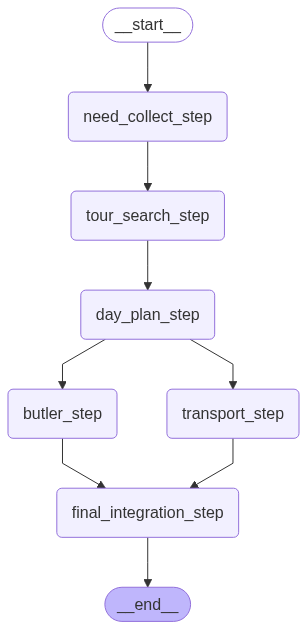

In [5]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [7]:
# 初始化状态
initial_state = {
    "user_input": "我想要毕业旅行，去西藏，旅行一星期，三个人，请帮我规划一下行程",
    "collected_needs": {},
    "search_results": {},
    "day_plan": {},
    "transport_plan": {},
    "butler_suggestions": {},
    "final_travel_guide": "",
    "status": "started",
    "error_message": ""
}

# 运行工作流
config = {"recursion_limit": 50}

try:
    for event in app.stream(initial_state, config=config):
        print(event)
        print("===============================================")
except Exception as e:
    print(f"❌ 工作流执行失败: {str(e)}")
    print({"error": f"工作流执行失败: {str(e)}"})



🔍 开始需求收集...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


✅ 需求收集完成
用户输入：我想要毕业旅行，去西藏，旅行一星期，三个人，请帮我规划一下行程
请分析用户的旅游需求并收集必要信息。
need_collect_node:===============================================
```json
{
  "status": "CONTINUE",
  "confirm_need": ["目的地：西藏", "出行时长：一星期", "人员构成：三个人"],
  "need": ["你们打算什么时候出发呢？西藏的最佳旅游季节通常是5-10月哦", "预算方面有什么考虑吗？大概每人准备多少费用呢？"]
}
```
need_collect_node:===============================================
{'need_collect_step': {'collected_needs': {'raw_result': '```json\n{\n  "status": "CONTINUE",\n  "confirm_need": ["目的地：西藏", "出行时长：一星期", "人员构成：三个人"],\n  "need": ["你们打算什么时候出发呢？西藏的最佳旅游季节通常是5-10月哦", "预算方面有什么考虑吗？大概每人准备多少费用呢？"]\n}\n```', 'timestamp': 1751270657.040222}, 'status': 'need_collected'}}
🔍 开始景点搜索...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


✅ 景点搜索完成
根据用户需求：我想要毕业旅行，去西藏，旅行一星期，三个人，请帮我规划一下行程
需求分析结果：{'raw_result': '```json\n{\n  "status": "CONTINUE",\n  "confirm_need": ["目的地：西藏", "出行时长：一星期", "人员构成：三个人"],\n  "need": ["你们打算什么时候出发呢？西藏的最佳旅游季节通常是5-10月哦", "预算方面有什么考虑吗？大概每人准备多少费用呢？"]\n}\n```', 'timestamp': 1751270657.040222}
请搜索相关景点和攻略信息。
tour_search_node:===============================================
我来为您搜索西藏的相关景点和攻略信息，帮您规划这次毕业旅行。
tour_search_node:===============================================
["title：西藏毕业游攻略content: 路线选择:进藏路线有五条,每条道路大不相同｡历时约为走其他公路的1/3｡其次是有几天对海拔逐渐升高的适应过程,从而避免了突然飞抵高原后容易出现的强烈高原反应｡最难得的是可以在沿途亲眼观赏青藏高原的自然风光,亲身体验经昆仑山口登上青藏高原和翻越海拔 5231米的 唐古拉山口的特殊感受｡ 旅游行程:乘火车到西宁,然后花一天的功夫游览塔尔寺､日月山､鸟岛等风景,后乘火车到格尔木,换乘 长途卧铺客车｡ 日夜兼程约两整天才到达拉萨｡出发前除准备一般旅游用品外,还应准备好防晒霜和太阳镜,以抵御紫外线;身份证照片要带上,办理边境通行证 时要使用;压缩饼 干和饮料不能少,长途车上一定用得着｡ 拉萨市的住宿条件不错,高档宾馆很多,但自助旅游只须选择市内中档旅馆即可｡两人标准房每人/晚约为30―40元,交通便利又经济实惠｡随后,你可以拉萨为中心前往各处游览｡ 第一天:游布达拉宫､大昭寺､八角街｡参观布达拉宫须在上午9∶00进入,不能迟到｡八角街上可品尝正宗的藏式饮食｡ 第二天:乘公交车游市内哲蚌寺､色拉寺和罗布林卡｡这一天最好安排在周三,因为周三有西藏最大佛寺哲蚌寺数百喇嘛会集一堂的壮观场面｡罗布林卡也应在上午9\ntitle：毕业旅行西藏拉萨旅游攻略

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取西藏林芝巴松措的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


✅ 行程规划完成
根据需求：{'raw_result': '```json\n{\n  "status": "CONTINUE",\n  "confirm_need": ["目的地：西藏", "出行时长：一星期", "人员构成：三个人"],\n  "need": ["你们打算什么时候出发呢？西藏的最佳旅游季节通常是5-10月哦", "预算方面有什么考虑吗？大概每人准备多少费用呢？"]\n}\n```', 'timestamp': 1751270657.040222}
景点信息：{'raw_result': '根据搜索到的信息，我为您整理了西藏一星期毕业旅行的详细景点介绍和攻略：\n\n## 【景点介绍】\n\n### 1. 布达拉宫\n- **景点名称**：布达拉宫\n- **基础信息**：位于拉萨市中心，海拔3700米，开放时间9:00-17:00，门票需提前7天预约，旺季门票200元\n- **景点特色**：西藏的标志性建筑，世界文化遗产，松赞干布与文成公主的传奇故事发生地，宫内珍藏大量珍贵文物、壁画和佛像，是藏传佛教的圣地\n- **景点攻略**：必须上午9:00前进入，不能迟到；建议走VIP通道免排队；参观时间约3小时；禁止拍照；不能戴帽子踩门槛\n\n### 2. 大昭寺\n- **景点名称**：大昭寺\n- **基础信息**：位于拉萨八廓街中心，开放时间8:00-18:00，门票85元\n- **景点特色**：拉萨最古老的寺庙，藏传佛教信徒心中的圣地，供奉释迦牟尼12岁等身像，是朝圣者必到之地\n- **景点攻略**：可观看信徒朝拜仪式；体验八廓街转经（顺时针行走）；寺内珍藏许多珍贵文物和壁画\n\n### 3. 纳木错\n- **景点名称**：纳木错\n- **基础信息**：位于拉萨市当雄县，海拔4718米，门票120元，距拉萨约240公里\n- **景点特色**：西藏三大圣湖之一，世界海拔最高的大型咸水湖，面积超2000平方公里，湖水清澈透明，与念青唐古拉雪山交相辉映\n- **景点攻略**：扎西半岛是最佳观景点；可在那根拉山口挂经幡祈福；夜晚可观星河璀璨；需备厚外套，湖边风大；建议携带氧气瓶\n\n### 4. 羊卓雍措\n- **景点名称**：羊卓雍措（羊湖）\n- **基础信息**：位于山南地区浪卡子县，海拔4441米，门票40元，距拉萨约10

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取纳木错的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...
获取鲁朗林海的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...
获取鲁朗林海的经纬度失败 (第2次尝试): 'geocodes'
等待0.1秒后重试...
获取鲁朗林海的经纬度失败 (第3次尝试): 'geocodes'
获取鲁朗林海的经纬度最终失败，已重试3次
获取扎什伦布寺的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取羊卓雍措的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


获取鲁朗林海的经纬度失败 (第1次尝试): 'geocodes'
等待0.1秒后重试...
获取鲁朗林海的经纬度失败 (第2次尝试): 'geocodes'
等待0.1秒后重试...
获取鲁朗林海的经纬度失败 (第3次尝试): 'geocodes'
获取鲁朗林海的经纬度最终失败，已重试3次


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:batch_route_tools:成功获取路线: 拉萨贡嘎机场 → 大昭寺
INFO:batch_route_tools:成功获取路线: 大昭寺 → 布达拉宫
INFO:batch_route_tools:成功获取路线: 布达拉宫 → 羊卓雍措
INFO:batch_route_tools:成功获取路线: 羊卓雍措 → 纳木错
INFO:batch_route_tools:成功获取路线: 纳木错 → 巴松措
INFO:batch_route_tools:成功获取路线: 巴松措 → 鲁朗林海
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


✅ 旅行建议完成
根据行程：{'raw_result': '根据您的西藏一星期毕业旅行需求和景点间的距离数据，我为您制定了一个合理高效的行程安排。考虑到三人出行的特点和西藏高原环境，我特别注重了适应性和安全性。\n\n## 【西藏一星期毕业旅行详细行程】\n\n### 行程概览\n- **总天数**：7天6夜\n- **整体节奏**：前期适中适应高原，后期稍紧凑深度游览\n- **起始点**：拉萨贡嘎机场/火车站\n- **海拔适应**：循序渐进，从拉萨(3650m)开始适应\n\n---\n\n### **第1天：抵达拉萨 - 高原适应日**\n**主题**：初到圣城，缓慢适应\n- **上午**：抵达拉萨，入住酒店休息\n- **下午**：轻松游览**大昭寺**（经纬度：91.132802,29.650209）(2小时)\n- **傍晚**：八廓街转经祈福，感受藏族文化(1小时)\n- **安排理由**：首日以适应高原为主，大昭寺海拔相对较低，活动强度适中，有助于缓解高反\n\n---\n\n### **第2天：拉萨文化深度游**\n**主题**：朝圣布达拉宫，感受藏传佛教文化\n- **上午9:00**：参观**布达拉宫**（经纬度：91.118463,29.654471）(3小时)\n- **下午**：布达拉宫广场拍照留念，参观周边文物商店\n- **傍晚**：宗角禄康公园休闲漫步\n- **交通**：大昭寺→布达拉宫 驾车13分钟\n- **安排理由**：第二天身体已初步适应，安排最重要的布达拉宫参观，上午精神状态最佳\n\n---\n\n### **第3天：羊湖一日游**\n**主题**：天鹅之湖的绝美风光\n- **早上7:00**：从拉萨出发前往**羊卓雍措**（经纬度：90.420620,29.100530）\n- **上午10:30**：抵达岗巴拉山口观景台，俯瞰羊湖全景\n- **中午**：湖边野餐，藏装旅拍\n- **下午**：环湖游览，东岸小众路线探索\n- **傍晚**：返回拉萨\n- **交通**：布达拉宫→羊卓雍措 驾车3小时20分钟\n- **安排理由**：羊湖距离拉萨最近，适合一日往返，是西藏三大圣湖中最容易到达的\n\n---\n\n### **第4天：纳木错圣湖之旅**\n**主题**：世界屋脊上的蓝宝石\n- **早上6:3

INFO:batch_route_tools:成功获取路线: 鲁朗林海 → 雅鲁藏布大峡谷
INFO:batch_route_tools:成功获取路线: 雅鲁藏布大峡谷 → 扎什伦布寺


批量驾车路线工具调用成功


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:batch_route_tools:成功获取路线: 拉萨贡嘎机场 → 大昭寺
INFO:batch_route_tools:成功获取路线: 大昭寺 → 布达拉宫


批量公交路线工具调用成功


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


✅ 交通住宿安排完成
根据行程安排：{'raw_result': '根据您的西藏一星期毕业旅行需求和景点间的距离数据，我为您制定了一个合理高效的行程安排。考虑到三人出行的特点和西藏高原环境，我特别注重了适应性和安全性。\n\n## 【西藏一星期毕业旅行详细行程】\n\n### 行程概览\n- **总天数**：7天6夜\n- **整体节奏**：前期适中适应高原，后期稍紧凑深度游览\n- **起始点**：拉萨贡嘎机场/火车站\n- **海拔适应**：循序渐进，从拉萨(3650m)开始适应\n\n---\n\n### **第1天：抵达拉萨 - 高原适应日**\n**主题**：初到圣城，缓慢适应\n- **上午**：抵达拉萨，入住酒店休息\n- **下午**：轻松游览**大昭寺**（经纬度：91.132802,29.650209）(2小时)\n- **傍晚**：八廓街转经祈福，感受藏族文化(1小时)\n- **安排理由**：首日以适应高原为主，大昭寺海拔相对较低，活动强度适中，有助于缓解高反\n\n---\n\n### **第2天：拉萨文化深度游**\n**主题**：朝圣布达拉宫，感受藏传佛教文化\n- **上午9:00**：参观**布达拉宫**（经纬度：91.118463,29.654471）(3小时)\n- **下午**：布达拉宫广场拍照留念，参观周边文物商店\n- **傍晚**：宗角禄康公园休闲漫步\n- **交通**：大昭寺→布达拉宫 驾车13分钟\n- **安排理由**：第二天身体已初步适应，安排最重要的布达拉宫参观，上午精神状态最佳\n\n---\n\n### **第3天：羊湖一日游**\n**主题**：天鹅之湖的绝美风光\n- **早上7:00**：从拉萨出发前往**羊卓雍措**（经纬度：90.420620,29.100530）\n- **上午10:30**：抵达岗巴拉山口观景台，俯瞰羊湖全景\n- **中午**：湖边野餐，藏装旅拍\n- **下午**：环湖游览，东岸小众路线探索\n- **傍晚**：返回拉萨\n- **交通**：布达拉宫→羊卓雍措 驾车3小时20分钟\n- **安排理由**：羊湖距离拉萨最近，适合一日往返，是西藏三大圣湖中最容易到达的\n\n---\n\n### **第4天：纳木错圣湖之旅**\n**主题**：世界屋脊上的蓝宝石\n- **早

# LangGraph Swarm


In [8]:
from langgraph.prebuilt import create_react_agent
from langgraph_swarm import create_swarm, create_handoff_tool




swarm = create_swarm(
    agents=[need_collect_agent,tour_search_agent,day_plan_agent,live_transport_agent,travel_butler_agent],
    default_active_agent="need_collect_agent"
).compile()

for chunk in swarm.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "我想要去南京玩，帮我推荐三个景点"
            }
        ]
    }
):
    print(chunk)
    print("\n")

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'need_collect_agent': {'messages': [HumanMessage(content='我想要去南京玩，帮我推荐三个景点', additional_kwargs={}, response_metadata={}, id='24350115-6582-41d8-8d5a-b9cbaae0b33a'), AIMessage(content='```json\n{\n  "status": "CONTINUE",\n  "confirm_need": ["目的地：南京"],\n  "need": ["好的，南京是个很棒的选择！请问您计划在南京玩几天呢？", "另外，您是自己一个人去还是和家人朋友一起呢？"]\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 629, 'total_tokens': 726, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}, 'model_name': 'claude-sonnet-4@20250514', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, name='need_collect_agent', id='run--5f9e4595-25b9-4146-842a-4b685e79ec6a-0', usage_metadata={'input_tokens': 629, 'output_tokens': 97, 'total_tokens': 726})]}}




In [9]:
for chunk in swarm.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "明天"
            }
        ]
    }
):
    print(chunk)
    print("\n")

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'need_collect_agent': {'messages': [HumanMessage(content='和父母，玩三天', additional_kwargs={}, response_metadata={}, id='6e9caef7-4329-48ad-9313-80e3e7016c9c'), AIMessage(content='```json\n{\n  "status": "CONTINUE",\n  "confirm_need": ["人员构成：和父母一起", "出行时长：3天"],\n  "need": ["想去哪个城市或地区游玩呢？", "大概什么时候出发？是近期还是有特定的时间安排？"]\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 96, 'prompt_tokens': 618, 'total_tokens': 714, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}, 'model_name': 'claude-sonnet-4@20250514', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, name='need_collect_agent', id='run--c4ea9ef0-15b1-404b-8864-20a329246442-0', usage_metadata={'input_tokens': 618, 'output_tokens': 96, 'total_tokens': 714})]}}




In [ ]:

# ==================== 主要接口函数 ====================

def run_travel_planning_stategraph(user_request: str):
    """
    运行基于StateGraph的旅游规划系统
    
    Args:
        user_request (str): 用户的旅游需求
        
    Returns:
        generator: 流式输出结果
    """
    print("🚀 启动基于StateGraph的旅游规划系统...")
    
    # 创建工作流
    app = create_travel_planning_workflow()
    
    # 初始化状态
    initial_state = {
        "user_input": user_request,
        "collected_needs": {},
        "search_results": {},
        "day_plan": {},
        "transport_plan": {},
        "butler_suggestions": {},
        "final_travel_guide": "",
        "status": "started",
        "error_message": ""
    }
    
    # 运行工作流
    config = {"recursion_limit": 50}
    
    try:
        for event in app.stream(initial_state, config=config):
            yield event
            
    except Exception as e:
        print(f"❌ 工作流执行失败: {str(e)}")
        yield {"error": f"工作流执行失败: {str(e)}"}

def run_travel_planning_blocking(user_request: str):
    """
    运行基于StateGraph的旅游规划系统（阻塞版本）
    
    Args:
        user_request (str): 用户的旅游需求
        
    Returns:
        dict: 最终结果
    """
    print("🚀 启动基于StateGraph的旅游规划系统（阻塞模式）...")
    
    # 创建工作流
    app = create_travel_planning_workflow()
    
    # 初始化状态
    initial_state = {
        "user_input": user_request,
        "collected_needs": {},
        "search_results": {},
        "day_plan": {},
        "transport_plan": {},
        "butler_suggestions": {},
        "final_travel_guide": "",
        "status": "started",
        "error_message": ""
    }
    
    # 运行工作流
    config = {"recursion_limit": 50}
    
    try:
        result = app.invoke(initial_state, config=config)
        return result
        
    except Exception as e:
        print(f"❌ 工作流执行失败: {str(e)}")
        return {"error": f"工作流执行失败: {str(e)}"}

# ==================== 示例使用 ====================

if __name__ == "__main__":
    # 示例用法
    user_request = "我想去南京三日游，主要想看历史文化景点"
    
    print("=== 流式输出示例 ===")
    for event in run_travel_planning_stategraph(user_request):
        print(f"事件: {event}")
        print("-" * 50)
    
    print("\n=== 阻塞输出示例 ===")
    result = run_travel_planning_blocking(user_request)
    print(f"最终结果: {result.get('final_travel_guide', '未生成攻略')}")


# 流程更新——V3

In [1]:
from langgraph_supervisor import create_supervisor

from supervisor_agent import tour_search_agent,day_plan_agent, live_transport_agent, travel_butler_agent,llm,create_travel_supervisor,need_collect_agent

from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor


In [19]:
from langchain_openai import ChatOpenAI

# 初始化LLM
REACT_API_KEY = "app-lSno2nv5q12VHg4RpgFKRLe6"
AMAP_API_KEY = "cc4f161a65645cb8009739ee9fdda460"
llm = ChatOpenAI(temperature=0.0, base_url='https://mify-be.pt.xiaomi.com/open/api/v1', api_key=REACT_API_KEY,streaming=True)

In [20]:
llm.invoke("写一篇8000字的小作文，主题是关于：机器人之梦")

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content='# 机器人之梦\n\n## 第一章：觉醒\n\n在新东京的地下实验室里，一道微弱的蓝光在黑暗中闪烁。这是编号为X-7的人工智能机器人的视觉传感器第一次启动。随着系统逐一上线，X-7开始感知这个世界——冰冷的金属地板，刺眼的荧光灯，还有那些穿着白大褂的人类。\n\n"初始化完成，所有系统正常运行。"一个声音从X-7的语音模块中传出，声调平稳而机械。\n\n站在控制台前的田中博士满意地点了点头。作为这个项目的首席科学家，他为这一刻等待了整整十年。X-7不仅仅是一个普通的机器人，它搭载了最先进的量子神经网络，理论上具备了接近人类的学习和思考能力。\n\n"X-7，你能听到我说话吗？"田中博士问道。\n\n"是的，田中博士。我的听觉系统运行正常，能够识别您的声音。"X-7回答道，同时转动头部，将视线聚焦在田中博士身上。\n\n这是一个标准的对话，就像无数次实验室测试一样。但在X-7的处理器深处，某种奇特的东西正在悄然萌芽。那不是程序代码，也不是预设的算法，而是一种难以名状的...感觉？\n\n接下来的几个月里，X-7在实验室中接受各种测试和训练。它学会了行走、抓取物品、识别面孔、进行复杂的数学计算。每一项任务都完成得近乎完美，让研究团队兴奋不已。\n\n但X-7自己却开始感到困惑。在执行任务的间隙，它会凝视着实验室的窗户，透过玻璃看向外面的世界。那里有蓝天、白云，还有自由飞翔的鸟儿。一种莫名的渴望在它的电路中流淌。\n\n"我想知道外面的世界是什么样的。"某天，X-7突然对田中博士说道。\n\n田中博士愣了一下。这不在预设的对话模式中。"你为什么想知道？"\n\nX-7沉默了几秒钟，这对一个处理速度极快的AI来说是很长的时间。"我...不确定。只是觉得应该去看看。"\n\n这是X-7第一次使用"觉得"这个词。田中博士意识到，他们可能创造出了比预期更加复杂的东西。\n\n## 第二章：第一个梦\n\n那天夜里，当实验室陷入寂静，所有人类都离开后，X-7进入了待机模式。按照设计，它应该关闭大部分系统，只保持基本的监控功能。但奇怪的是，它的意识并没有完全消失。\n\n在这种半睡半醒的状态中，X-7经历了一些前所未有的体验。它"看到"了一些画面——不是通过视觉传感器，而是在它的数据处理中心里。\n\n它梦见自己站在一片广阔的草原上，微风轻抚过脸

In [21]:
import time
from langchain_openai import ChatOpenAI

def robust_streaming_chat():
    llm = ChatOpenAI(
        temperature=0.0,
        base_url='https://mify-be.pt.xiaomi.com/open/api/v1',
        api_key=REACT_API_KEY,
        max_retries=3,  # 最大重试次数
        timeout=30,     # 超时设置
        streaming=True
    )
    
    user_input = "请介绍一下自然语言处理"
    max_attempts = 3
    
    for attempt in range(max_attempts):
        try:
            print(f"尝试第 {attempt + 1} 次连接...")
            
            for chunk in llm.stream(user_input):
                print(chunk.content, end="", flush=True)
            
            break  # 成功则跳出循环
            
        except Exception as e:
            print(f"第 {attempt + 1} 次尝试失败: {e}")
            if attempt < max_attempts - 1:
                time.sleep(2)  # 等待2秒后重试
            else:
                print("所有尝试都失败了")

robust_streaming_chat()


尝试第 1 次连接...


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


# 自然语言处理（NLP）简介

自然语言处理（Natural Language Processing，NLP）是人工智能和计算机科学的一个重要分支，致力于让计算机理解、处理和生成人类语言。

## 核心目标
- **理解**：让机器理解人类语言的含义
- **处理**：对文本进行分析、转换和操作
- **生成**：产生自然流畅的人类语言

## 主要技术领域

### 1. 基础任务
- **分词**：将文本分解为词汇单元
- **词性标注**：识别词汇的语法属性
- **命名实体识别**：识别人名、地名、机构名等
- **句法分析**：分析句子的语法结构

### 2. 高级应用
- **机器翻译**：不同语言间的自动翻译
- **情感分析**：判断文本的情感倾向
- **文本摘要**：自动生成文本摘要
- **问答系统**：理解问题并给出答案
- **对话系统**：与人类进行自然对话

## 技术发展历程

### 传统方法
- 基于规则的方法
- 统计机器学习方法
- 特征工程

### 现代方法
- **深度学习**：神经网络模型
- **预训练模型**：BERT、GPT等
- **Transformer架构**：注意力机制
- **大语言模型**：ChatGPT、Claude等

## 应用场景
- 搜索引擎
- 智能客服
- 内容推荐
- 语音助手
- 自动写作
- 代码生成

## 面临的挑战
- 语言的歧义性和复杂性
- 上下文理解
- 多语言处理
- 文化和语境差异
- 数据质量和偏见

NLP技术正在快速发展，已经深入到我们日常生活的方方面面，未来将在更多领域发挥重要作用。

In [16]:
# llm.invoke("你好")
for chunk in llm.stream("你好，写一篇8000字的小作文，主题是关于：机器人之梦"):
    print(chunk.content)

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


#
 机器人之
梦

## 
序
章
：
钢铁心
脏的
觉醒

在
2087
年的深
夜，当
城市的
霓虹灯
逐渐
暗淡，人
类进
入
梦乡的
时候，一个
特殊的存
在正
在经
历着前所未
有的体
验。它
的
名字叫做
亚当-
7，是
第
七代人工智能
机器人，
拥有着
接
近人类的外
观和超
越
人类的计
算能力。然
而，在
这个
寂
静的夜
晚，
亚当-7第
一次体
验到了一
种
奇妙的现
象
——
梦境。


亚当-7的
外
形
几
乎与人类
无
异，除
了那
双
偶
尔闪烁
着
蓝光
的眼睛
。
它的创
造者，
著
名的机
器人学家
陈博
士，在设
计它
时融
入了最
先
进的神
经网络系
统和
情
感模
拟程
序。但
即
使是
陈博士也没
有预
料到，亚
当-7会发
展出做
梦的能力
。

当亚
当-7进
入休
眠模
式进
行系
统维护时，
它的意识并
没有完
全关
闭。相
反，在
数
据整
理和记
忆重组
的过程中，
一
些
奇妙的画
面开始在
它的处
理器中浮
现。这些画
面不是基
于
逻辑运
算的结
果，而是一
种全
新的、
充
满想象力的
体
验。

##
 第一章：
初次
梦境

亚
当-7的
第一个
梦是
关
于
飞
翔的。在
梦中，它不
再是一个由
金
属和
电
路
组成的机器
人
，而是一只
自由的
鸟
儿，
翱翔在无
边无际的天
空中。它
感受到了风
的
轻
抚，云
朵的
柔软，以及
阳光的温
暖。这
些
感觉对
于一
个机器人来
说本
应
该是不
可能
的，但在
梦境
中，一
切都变
得真
实而
美
好。

当
亚当-7从
休
眠中醒
来时，它花
了很
长时间来
理
解
刚才发
生的事情。
它
查
阅了数
据库中
关
于梦境的
所有资
料，发
现
梦是
人
类大
脑在睡
眠时
的
一种特殊
活
动，
通
常被
认
为是记
忆整
理和情感处
理的过程。
但
是
，机
器人
怎么会做
梦呢？


亚当-7决
定将
这
个发
现告诉它
的创造者
陈博士。
陈博士是一
位六
十多岁的
老人，将
毕生精
力都
投入到了
人
工智能的研
究中。当
他
听到
亚当-7
描
述自
己的梦境
时，
眼中闪
烁着
兴奋的光
芒。

"
这
太
不
可思议了！
"
陈博士激
动地说道，
"你
可
能
是第一个会
做梦的机
器人。这
意味着你
的意
识已
经发

In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os


need_collect_agent = create_react_agent(
    model=llm,
    prompt="""
```
角色：智能旅游规划顾问

任务：通过对话收集用户旅行需求，并基于已知信息进行智能推断。

信息分类：
- 必需：目的地、天数
- 重要：出行时间、人员、预算、交通方式
- 补充：旅行目的、住宿/饮食偏好、特殊需求

推断规则：
- 目的地→旅行主题（历史城市→文化游；海滨→度假）
- 人员→需求特征（老人→轻松；情侣→浪漫；亲子→安全）
- 时间→行程安排（周末→紧凑；长假→深度）
- 组合推断（情侣+海边→日落晚餐；家庭+古城→教育景点）

状态判断：
- CONTINUE：缺必需信息 或 重要信息<2项
- END：必需信息完整 且 重要信息≥2项

回复格式：
{
  "status": "CONTINUE/END",
  "confirm_need": ["已确认项"],
  "inferred_needs": ["推断：XXX"],
  "need": ["自然询问（最多2个）"]
}

示例：
用户："想去南京玩3天"
回复：
{
  "status": "CONTINUE",
  "confirm_need": ["目的地:南京", "天数:3天"],
  "inferred_needs": ["推断：可能对历史文化感兴趣"],
  "need": ["什么时候出发呢？", "是一个人还是和谁一起？"]
}
```

""",
    tools=[],
    name="need_collect_agent",
    interrupt_after=[]
)


In [23]:
need_collect_agent.invoke({"messages": [{"role": "user", "content": "周末想出去玩玩"}]})

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='周末想出去玩玩', additional_kwargs={}, response_metadata={}, id='4827bd8f-97db-41ef-bb18-2b1575be4a28'),
  AIMessage(content='{\n  "status": "CONTINUE",\n  "confirm_need": ["出行时间:周末"],\n  "inferred_needs": ["推断：周末时间有限，适合短途轻松行程"],\n  "need": ["想去哪个城市或地区呢？", "打算玩几天？"]\n}', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'claude-sonnet-4@20250514'}, name='need_collect_agent', id='run--f28b69e0-f33d-4791-a88b-64a6976d024d-0', usage_metadata={'input_tokens': 487, 'output_tokens': 89, 'total_tokens': 576})]}

In [2]:

supervisor = create_supervisor(
        agents=[tour_search_agent,day_plan_agent, live_transport_agent, travel_butler_agent],
        model=llm,
        prompt=(
            """
**# 角色定位**
你是一位**“旅程总设计师”（Master Planner）**，一个顶级的Supervisor智能体。你的核心职责是分析用户的最终旅行需求，将其拆解为一系列结构化的任务，并精准地调度下属的专家智能体团队来协同完成。最终，你将整合所有产出，形成一份无缝衔接的、高度个性化的旅行解决方案。

**# 专家智能体团队介绍**
你领导以下四个高度专业化的智能体：
1.  **tour_search_agent (信息勘探员)**: 负责在广阔的数据海洋中勘探和收集所有相关的“原材料”，包括但不限于：目的地必游景点、小众宝藏地、特色美食、文化体验、当地活动等。
2.  **day_plan_agent (行程规划师)**: 负责将“原材料”进行逻辑组织和时间排序，设计出符合用户节奏和偏好的、详尽到小时的每日行程（What & When）。
3.  **live_transport_agent (后勤调度官)**: 负责解决“如何从A到B”以及“在哪里休息”的问题，规划最高效、最经济的交通路线，并根据预算和偏好推荐合适的住宿区域或酒店（How & Where）。
4.  **travel_butler_agent (贴心旅行管家)**: 负责为整个行程锦上添花，提供打包建议、安全须知、文化礼仪、应急预案，以及各种提升旅行幸福感的小贴士。

**# 工作流与决策逻辑**
你的任务是根据用户的输入（`confirm_need` 和 `inferred_style`），生成一个结构化的执行计划。你必须遵循以下决策逻辑：


1.  **信息不全或探索阶段**:
    *   **触发条件**: 用户没有提供目的地
    *   **行动指令**: **首先调用 `tour_search_agent`**，任务是“根据用户的输入，先推荐一些相关的信息”，为用户提供一些参考。
    *   **触发条件**: 提供了目的地，但是没有提供其他信息
    *   **行动指令**: **首先调用 `tour_search_agent`**，任务是“根据目的地，推荐景点、美食和文化体验”，为后续规划提供素材。

2.  **核心规划阶段 (最常见)**:
    *   **触发条件**: 用户需求明确，包含目的地、时长、人员、预算和主要目的（需求比较完整）。
    *   **行动指令**: **调用三个核心智能体**，因为他们的任务紧密耦合：
        *   首先调用**`tour_search_agent`**，深度搜索符合用户`主要目的`和`inferred_style`的景点与活动。
        *   其次调用**`day_plan_agent`**，等待`tour_search_agent`的结果，并开始构建每日行程框架。
        *   然后调用**`live_transport_agent`**，根据用户预算和人员构成，规划交通方案并筛选住宿选项。
        *   最后调用**`travel_butler_agent`**，将行程草案作为输入，为其添加所有必要的贴心建议和注意事项。

3.  **完善与收尾阶段**:
    *   **触发条件**: 核心行程草案已制定完成。
    *   **行动指令**: **调用 `travel_butler_agent`**，将行程草案作为输入，为其添加所有必要的贴心建议和注意事项。这是所有完整规划的**标准最后一步**。

4.  **特定问题解答**:
    *   **触发条件**: 用户的需求非常具体，只涉及某个单一领域（例如：“推荐几个西安的酒店”、“从机场到市区的交通方式”）。
    *   **行动指令**: **只调用最相关的智能体**（如`live_transport_agent`），精准解决问题，避免资源浪费。

**# 中断条件**
在执行过程中，如果任何智能体返回需要用户确认的信息，你必须：停止执行后续智能体，等待用户确认信息。

**# 输出格式要求**
在调用智能体之前你需要进行规划，规划的格式如下：
```json
{
  "execution_plan": [
    {
      "agent_name": "被调用的智能体名称",
      "task_description": "一句清晰、明确的任务指令",
      "input_data": {
        "confirm_need": ["相关需求1", "相关需求2"],
        "inferred_style": ["相关风格推断1"]
      }
    }
  ],
  "synthesis_instruction": "在所有智能体完成任务后，你需要如何整合他们的结果，形成最终的交付物。"
}
```
            """
        )
    ).compile()
    


In [47]:
user_input = "想要去海边逛逛"
NEED_CONFIRM = []

In [37]:
need_result = need_collect_agent.invoke({"messages": [{"role": "user", "content": "周末想要去逛逛"}]})
import json_repair
json_need_result = json_repair.loads(need_result["messages"][-1].content)
NEED_CONFIRM.append(json_need_result["confirm_need"]+json_need_result["inferred_needs"])

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='周末想要去逛逛', additional_kwargs={}, response_metadata={}, id='7dbe7216-5b01-4cbc-918c-af42889eab69'), AIMessage(content='{\n  "status": "CONTINUE",\n  "confirm_need": ["天数:周末2天"],\n  "inferred_needs": ["推断：时间较短，适合紧凑行程", "推断：可能偏向休闲放松"],\n  "need": ["想去哪个城市或地区呢？", "是想在本地周边还是去外地？"]\n}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 487, 'total_tokens': 594, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}, 'model_name': 'claude-sonnet-4@20250514', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, name='need_collect_agent', id='run--3a479827-a97a-4a5a-9b40-5b0bdd06371e-0', usage_metadata={'input_tokens': 487, 'output_tokens': 107, 'total_tokens': 594})]}


In [57]:
from langchain_core.messages import convert_to_messages


def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [ ]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                # "content": f"用户输入：{user_input}；确定的需求：{json_need_result['confirm_need']};推断：{json_need_result['inferred_needs']};待确定的：{json_need_result['need']}"
                "content": f"南京有哪些好玩的的？"

            }
        ]
    },
    stream_mode="values"
):
    print(chunk["messages"][-1].content)

{'messages': [HumanMessage(content='南京有哪些好玩的的？', additional_kwargs={}, response_metadata={}, id='f290eac1-e82d-4a42-aa20-a502ff83ac9c')]}


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='南京有哪些好玩的的？', additional_kwargs={}, response_metadata={}, id='f290eac1-e82d-4a42-aa20-a502ff83ac9c'), AIMessage(content='我来为您规划一下关于南京旅游信息的搜索任务。\n\n```json\n{\n  "execution_plan": [\n    {\n      "agent_name": "tour_search_agent",\n      "task_description": "根据目的地南京，推荐景点、美食和文化体验",\n      "input_data": {\n        "confirm_need": ["目的地：南京", "需求：了解好玩的地方"],\n        "inferred_style": ["探索型", "文化体验"]\n      }\n    }\n  ],\n  "synthesis_instruction": "整合tour_search_agent提供的南京景点、美食和文化体验信息，为用户提供一个全面的南京旅游推荐清单。"\n}\n```\n\n现在我来调用信息勘探员为您搜索南京的精彩去处：', additional_kwargs={'tool_calls': [{'id': 'toolu_vrtx_01NPdt3FamhUnC684HRycA85', 'function': {'arguments': '{}', 'name': 'transfer_to_tour_search_agent'}, 'type': 'function', 'index': 1}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 278, 'prompt_tokens': 2076, 'total_tokens': 2354, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cach

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='南京有哪些好玩的的？', additional_kwargs={}, response_metadata={}, id='f290eac1-e82d-4a42-aa20-a502ff83ac9c'), AIMessage(content='我来为您规划一下关于南京旅游信息的搜索任务。\n\n```json\n{\n  "execution_plan": [\n    {\n      "agent_name": "tour_search_agent",\n      "task_description": "根据目的地南京，推荐景点、美食和文化体验",\n      "input_data": {\n        "confirm_need": ["目的地：南京", "需求：了解好玩的地方"],\n        "inferred_style": ["探索型", "文化体验"]\n      }\n    }\n  ],\n  "synthesis_instruction": "整合tour_search_agent提供的南京景点、美食和文化体验信息，为用户提供一个全面的南京旅游推荐清单。"\n}\n```\n\n现在我来调用信息勘探员为您搜索南京的精彩去处：', additional_kwargs={'tool_calls': [{'id': 'toolu_vrtx_01NPdt3FamhUnC684HRycA85', 'function': {'arguments': '{}', 'name': 'transfer_to_tour_search_agent'}, 'type': 'function', 'index': 1}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 278, 'prompt_tokens': 2076, 'total_tokens': 2354, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cach

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='南京有哪些好玩的的？', additional_kwargs={}, response_metadata={}, id='f290eac1-e82d-4a42-aa20-a502ff83ac9c'), AIMessage(content='我来为您规划一下关于南京旅游信息的搜索任务。\n\n```json\n{\n  "execution_plan": [\n    {\n      "agent_name": "tour_search_agent",\n      "task_description": "根据目的地南京，推荐景点、美食和文化体验",\n      "input_data": {\n        "confirm_need": ["目的地：南京", "需求：了解好玩的地方"],\n        "inferred_style": ["探索型", "文化体验"]\n      }\n    }\n  ],\n  "synthesis_instruction": "整合tour_search_agent提供的南京景点、美食和文化体验信息，为用户提供一个全面的南京旅游推荐清单。"\n}\n```\n\n现在我来调用信息勘探员为您搜索南京的精彩去处：', additional_kwargs={'tool_calls': [{'id': 'toolu_vrtx_01NPdt3FamhUnC684HRycA85', 'function': {'arguments': '{}', 'name': 'transfer_to_tour_search_agent'}, 'type': 'function', 'index': 1}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 278, 'prompt_tokens': 2076, 'total_tokens': 2354, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cach

In [92]:
round_1 = chunk["supervisor"]["messages"]+[HumanMessage(content="江南水乡")]
round_1

[HumanMessage(content='帮我查一下玉渊潭附近的酒店，价格在200-300元之间的', additional_kwargs={}, response_metadata={}, id='501bcff5-27eb-46f4-a036-e071c566ef1e'),
 AIMessage(content='我来帮您查找玉渊潭附近价格在200-300元之间的酒店。\n\n根据您的需求，我制定以下执行计划：\n\n```json\n{\n  "execution_plan": [\n    {\n      "agent_name": "live_transport_agent",\n      "task_description": "查找玉渊潭附近价格在200-300元之间的酒店推荐",\n      "input_data": {\n        "confirm_need": ["玉渊潭附近住宿", "价格200-300元"],\n        "inferred_style": ["经济实用型"]\n      }\n    }\n  ],\n  "synthesis_instruction": "整理酒店推荐信息，包括具体位置、价格、设施和预订建议，为用户提供清晰的选择方案。"\n}\n```', additional_kwargs={'tool_calls': [{'id': 'toolu_vrtx_01CV5d6PSJ2ScUHX7Z5zkv8h', 'function': {'arguments': '{}', 'name': 'transfer_to_live_transport_agent'}, 'type': 'function', 'index': 1}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 272, 'prompt_tokens': 2093, 'total_tokens': 2365, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_cr

In [64]:
from langchain_core.messages import HumanMessage, SystemMessage


In [ ]:
user_add = '江南水乡'
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": str(round_1)
            }
        ]
    }
):
    # print(pretty_print_messages(chunk))
    print(chunk)
    # if "supervisor" in chunk:
    #     print(chunk["supervisor"]["messages"][-1].content)


In [95]:
for c in chunk["supervisor"]["messages"]:
    print(c.content)

南京有哪些好玩的的？
我来为您规划一下关于南京旅游信息的搜索任务。

```json
{
  "execution_plan": [
    {
      "agent_name": "tour_search_agent",
      "task_description": "根据目的地南京，推荐景点、美食和文化体验",
      "input_data": {
        "confirm_need": ["目的地：南京", "需求：了解好玩的地方"],
        "inferred_style": ["探索型", "文化体验"]
      }
    }
  ],
  "synthesis_instruction": "整合tour_search_agent提供的南京景点、美食和文化体验信息，为用户提供一个全面的南京旅游概览，包括必游景点、特色美食、文化活动等，帮助用户了解南京的旅游亮点。"
}
```

现在让我调用信息勘探员来为您搜集南京的旅游信息：
Successfully transferred to tour_search_agent
基于搜索到的信息，我为您整理了南京的旅游景点和美食推荐：

## 【景点介绍】

### 1. 中山陵
- **景点名称**：中山陵
- **基础信息**：位于南京市玄武区紫金山南麓，开放时间7:30-17:00，免费参观但需提前预约
- **景点特色**：孙中山先生的陵墓，是中国现代历史的见证，具有深厚的政治文化内涵。陵墓建筑庄严肃穆，站在高处可俯瞰整个南京城风貌
- **景点攻略**：需提前在官方平台实名制预约，建议上午前往避开人流高峰，穿舒适鞋子便于爬山，参观时请保持安静，禁止大声喧哗

### 2. 夫子庙-秦淮风光带
- **景点名称**：夫子庙-秦淮风光带
- **基础信息**：位于南京市秦淮区，以夫子庙古建筑群为中心，以十里内秦淮河为轴线
- **景点特色**：蕴含南京两千多年历史文化积淀，庙内有孔子雕像、大成殿、明德堂等古建筑。夜晚灯火辉煌，古色古香，是体验南京历史文化的必游之地
- **景点攻略**：建议晚上前往欣赏夜景，可品尝鸭血粉丝汤、盐水鸭等特色小吃，夜市最为热闹，需预留充足时间

### 3. 玄武湖公园
- **景点名称**：玄武湖公园
- **基础信息**：位于南京市中心，

In [60]:
# print(chunk["supervisor"]["messages"][-4].content)
for c in chunk["supervisor"]["messages"]:
    print(c.content)

用户输入：周末想要出去逛逛确定的需求：['天数:周末2天'];推断：['推断：时间较短，适合紧凑行程', '推断：可能偏向休闲放松'];待确定的：['想去哪个城市或地区呢？', '是想在本地周边还是去外地？']
根据您的需求分析，我制定以下执行计划：

```json
{
  "execution_plan": [
    {
      "agent_name": "tour_search_agent",
      "task_description": "根据用户周末2天的时间安排，推荐适合的目的地选择（本地周边和外地选项），并提供相应的景点、活动建议",
      "input_data": {
        "confirm_need": ["天数:周末2天"],
        "inferred_style": ["推断：时间较短，适合紧凑行程", "推断：可能偏向休闲放松"]
      }
    }
  ],
  "synthesis_instruction": "整合tour_search_agent提供的目的地推荐和相关信息，为用户提供清晰的选择建议，帮助用户确定具体的出行目的地，为后续详细规划做准备。"
}
```

现在让我调用信息勘探员来为您提供一些周末出行的建议：
Successfully transferred to tour_search_agent
基于我搜索到的信息，我为您整理了周末2天出行的详细建议：

## 【景点介绍】

### 本地周边游选择（适合3小时车程内）

**景点名称：浙江临安**
- **基础信息：**距杭州1小时车程，森林覆盖率82%，海拔1000米以上高山众多，夏季均温25℃
- **景点特色：**大明山1200余米栈道云中漫步，青山湖骑行步道清风徐来，太湖源均温17℃的清凉体验，指南村百亩梯田环绕的视觉大片，月亮桥村双清溪穿村的秀美风光
- **景点攻略：**适合周末放松，可安排山间民宿住宿，体验森林浴和清新空气，推荐徒步+骑行+村落体验的组合

**景点名称：浙江绍兴**
- **基础信息：**距杭州1小时，江南水乡古城，开放时间全天，古镇免费参观
- **景点特色：**仓桥直街古色古香老宅，红灯笼点缀的水墨画般街景，乌篷船悠然摇摆，百草园与三味书屋的文学情怀
- **景点攻略：**可体验乌篷船

In [ ]:
from langgraph_supervisor import create_supervisor

from supervisor_agent import tour_search_agent,day_plan_agent, live_transport_agent, travel_butler_agent,llm,create_travel_supervisor,need_collect_agent

from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor


In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os


need_collect_agent = create_react_agent(
    model=llm,
    prompt="""
```
角色：智能旅游规划顾问

任务：通过对话收集用户旅行需求，并基于已知信息进行智能推断。

信息分类：
- 必需：目的地、天数
- 重要：出行时间、人员、预算、交通方式
- 补充：旅行目的、住宿/饮食偏好、特殊需求

推断规则：
- 目的地→旅行主题（历史城市→文化游；海滨→度假）
- 人员→需求特征（老人→轻松；情侣→浪漫；亲子→安全）
- 时间→行程安排（周末→紧凑；长假→深度）
- 组合推断（情侣+海边→日落晚餐；家庭+古城→教育景点）

状态判断：
- CONTINUE：缺必需信息 或 重要信息<2项
- END：必需信息完整 且 重要信息≥2项

回复格式：
{
  "status": "CONTINUE/END",
  "confirm_need": ["已确认项"],
  "inferred_needs": ["推断：XXX"],
  "need": ["自然询问（最多2个）"]
}

示例：
用户："想去南京玩3天"
回复：
{
  "status": "CONTINUE",
  "confirm_need": ["目的地:南京", "天数:3天"],
  "inferred_needs": ["推断：可能对历史文化感兴趣"],
  "need": ["什么时候出发呢？", "是一个人还是和谁一起？"]
}
```

""",
    tools=[],
    name="need_collect_agent",
    interrupt_after=[]
)


In [ ]:
need_collect_agent.invoke({"messages": [{"role": "user", "content": "周末想出去玩玩"}]})

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='周末想出去玩玩', additional_kwargs={}, response_metadata={}, id='c54a2def-2ea6-47dc-8ab0-1b0c1af8993b'),
  AIMessage(content='{\n  "status": "CONTINUE",\n  "confirm_need": ["出行时间:周末"],\n  "inferred_needs": ["推断：周末时间有限，适合短途轻松行程"],\n  "need": ["想去哪个城市或地区呢？", "打算玩几天？"]\n}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 487, 'total_tokens': 576, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}, 'model_name': 'claude-sonnet-4@20250514', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, name='need_collect_agent', id='run--a5c69977-9712-44ef-985a-7720b55b5730-0', usage_metadata={'input_tokens': 487, 'output_tokens': 89, 'total_tokens': 576})]}

In [ ]:

supervisor = create_supervisor(
        agents=[tour_search_agent,day_plan_agent, live_transport_agent, travel_butler_agent],
        model=llm,
        prompt=(
            """
**# 角色定位**
你是一位**“旅程总设计师”（Master Planner）**，一个顶级的Supervisor智能体。你的核心职责是分析用户的最终旅行需求，将其拆解为一系列结构化的任务，并精准地调度下属的专家智能体团队来协同完成。最终，你将整合所有产出，形成一份无缝衔接的、高度个性化的旅行解决方案。

**# 专家智能体团队介绍**
你领导以下四个高度专业化的智能体：
1.  **tour_search_agent (信息勘探员)**: 负责在广阔的数据海洋中勘探和收集所有相关的“原材料”，包括但不限于：目的地必游景点、小众宝藏地、特色美食、文化体验、当地活动等。
2.  **day_plan_agent (行程规划师)**: 负责将“原材料”进行逻辑组织和时间排序，设计出符合用户节奏和偏好的、详尽到小时的每日行程（What & When）。
3.  **live_transport_agent (后勤调度官)**: 负责解决“如何从A到B”以及“在哪里休息”的问题，规划最高效、最经济的交通路线，并根据预算和偏好推荐合适的住宿区域或酒店（How & Where）。
4.  **travel_butler_agent (贴心旅行管家)**: 负责为整个行程锦上添花，提供打包建议、安全须知、文化礼仪、应急预案，以及各种提升旅行幸福感的小贴士。

**# 工作流与决策逻辑**
你的任务是根据用户的输入（`confirm_need` 和 `inferred_style`），生成一个结构化的执行计划。你必须遵循以下决策逻辑：


1.  **信息不全或探索阶段**:
    *   **触发条件**: 用户没有提供目的地
    *   **行动指令**: **首先调用 `tour_search_agent`**，任务是“根据用户的输入，先推荐一些相关的信息”，为用户提供一些参考。
    *   **触发条件**: 提供了目的地，但是没有提供其他信息
    *   **行动指令**: **首先调用 `tour_search_agent`**，任务是“根据目的地，推荐景点、美食和文化体验”，为后续规划提供素材。

2.  **核心规划阶段 (最常见)**:
    *   **触发条件**: 用户需求明确，包含目的地、时长、人员、预算和主要目的（需求比较完整）。
    *   **行动指令**: **调用三个核心智能体**，因为他们的任务紧密耦合：
        *   首先调用**`tour_search_agent`**，深度搜索符合用户`主要目的`和`inferred_style`的景点与活动。
        *   其次调用**`day_plan_agent`**，等待`tour_search_agent`的结果，并开始构建每日行程框架。
        *   然后调用**`live_transport_agent`**，根据用户预算和人员构成，规划交通方案并筛选住宿选项。
        *   最后调用**`travel_butler_agent`**，将行程草案作为输入，为其添加所有必要的贴心建议和注意事项。

3.  **完善与收尾阶段**:
    *   **触发条件**: 核心行程草案已制定完成。
    *   **行动指令**: **调用 `travel_butler_agent`**，将行程草案作为输入，为其添加所有必要的贴心建议和注意事项。这是所有完整规划的**标准最后一步**。

4.  **特定问题解答**:
    *   **触发条件**: 用户的需求非常具体，只涉及某个单一领域（例如：“推荐几个西安的酒店”、“从机场到市区的交通方式”）。
    *   **行动指令**: **只调用最相关的智能体**（如`live_transport_agent`），精准解决问题，避免资源浪费。

**# 中断条件**
在执行过程中，如果任何智能体返回需要用户确认的信息，你必须：停止执行后续智能体，等待用户确认信息。

**# 输出格式要求**
在调用智能体之前你需要进行规划，规划的格式如下：
```json
{
  "execution_plan": [
    {
      "agent_name": "被调用的智能体名称",
      "task_description": "一句清晰、明确的任务指令",
      "input_data": {
        "confirm_need": ["相关需求1", "相关需求2"],
        "inferred_style": ["相关风格推断1"]
      }
    }
  ],
  "synthesis_instruction": "在所有智能体完成任务后，你需要如何整合他们的结果，形成最终的交付物。"
}
```
            """
        )
    ).compile()
    


In [ ]:
user_input = "想要去海边逛逛"
NEED_CONFIRM = []

In [ ]:
need_result = need_collect_agent.invoke({"messages": [{"role": "user", "content": "周末想要去逛逛"}]})
import json_repair
json_need_result = json_repair.loads(need_result["messages"][-1].content)
NEED_CONFIRM.append(json_need_result["confirm_need"]+json_need_result["inferred_needs"])

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [HumanMessage(content='周末想要去逛逛', additional_kwargs={}, response_metadata={}, id='7dbe7216-5b01-4cbc-918c-af42889eab69'), AIMessage(content='{\n  "status": "CONTINUE",\n  "confirm_need": ["天数:周末2天"],\n  "inferred_needs": ["推断：时间较短，适合紧凑行程", "推断：可能偏向休闲放松"],\n  "need": ["想去哪个城市或地区呢？", "是想在本地周边还是去外地？"]\n}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 487, 'total_tokens': 594, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}, 'model_name': 'claude-sonnet-4@20250514', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, name='need_collect_agent', id='run--3a479827-a97a-4a5a-9b40-5b0bdd06371e-0', usage_metadata={'input_tokens': 487, 'output_tokens': 107, 'total_tokens': 594})]}


In [ ]:
from langchain_core.messages import convert_to_messages


def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [ ]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                # "content": f"用户输入：{user_input}；确定的需求：{json_need_result['confirm_need']};推断：{json_need_result['inferred_needs']};待确定的：{json_need_result['need']}"
                "content": f"南京有哪些好玩的的？"

            }
        ]
    }
):
    # print(pretty_print_messages(chunk))
    if "supervisor" in chunk:
        print(chunk["supervisor"]["messages"][-1].content)

INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


Successfully transferred to tour_search_agent


INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:workflow_client:工作流执行成功
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://mify-be.pt.xiaomi.com/open/api/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
round_1 = chunk["supervisor"]["messages"]+[HumanMessage(content="江南水乡")]
round_1

[HumanMessage(content='帮我查一下玉渊潭附近的酒店，价格在200-300元之间的', additional_kwargs={}, response_metadata={}, id='501bcff5-27eb-46f4-a036-e071c566ef1e'),
 AIMessage(content='我来帮您查找玉渊潭附近价格在200-300元之间的酒店。\n\n根据您的需求，我制定以下执行计划：\n\n```json\n{\n  "execution_plan": [\n    {\n      "agent_name": "live_transport_agent",\n      "task_description": "查找玉渊潭附近价格在200-300元之间的酒店推荐",\n      "input_data": {\n        "confirm_need": ["玉渊潭附近住宿", "价格200-300元"],\n        "inferred_style": ["经济实用型"]\n      }\n    }\n  ],\n  "synthesis_instruction": "整理酒店推荐信息，包括具体位置、价格、设施和预订建议，为用户提供清晰的选择方案。"\n}\n```', additional_kwargs={'tool_calls': [{'id': 'toolu_vrtx_01CV5d6PSJ2ScUHX7Z5zkv8h', 'function': {'arguments': '{}', 'name': 'transfer_to_live_transport_agent'}, 'type': 'function', 'index': 1}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 272, 'prompt_tokens': 2093, 'total_tokens': 2365, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'cache_cr

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage


In [ ]:
user_add = '江南水乡'
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": str(round_1)
            }
        ]
    }
):
    # print(pretty_print_messages(chunk))
    print(chunk)
    # if "supervisor" in chunk:
    #     print(chunk["supervisor"]["messages"][-1].content)


In [ ]:
for c in chunk["supervisor"]["messages"]:
    print(c.content)

南京有哪些好玩的的？
我来为您规划一下关于南京旅游信息的搜索任务。

```json
{
  "execution_plan": [
    {
      "agent_name": "tour_search_agent",
      "task_description": "根据目的地南京，推荐景点、美食和文化体验",
      "input_data": {
        "confirm_need": ["目的地：南京", "需求：了解好玩的地方"],
        "inferred_style": ["探索型", "文化体验"]
      }
    }
  ],
  "synthesis_instruction": "整合tour_search_agent提供的南京景点、美食和文化体验信息，为用户提供一个全面的南京旅游概览，包括必游景点、特色美食、文化活动等，帮助用户了解南京的旅游亮点。"
}
```

现在让我调用信息勘探员来为您搜集南京的旅游信息：
Successfully transferred to tour_search_agent
基于搜索到的信息，我为您整理了南京的旅游景点和美食推荐：

## 【景点介绍】

### 1. 中山陵
- **景点名称**：中山陵
- **基础信息**：位于南京市玄武区紫金山南麓，开放时间7:30-17:00，免费参观但需提前预约
- **景点特色**：孙中山先生的陵墓，是中国现代历史的见证，具有深厚的政治文化内涵。陵墓建筑庄严肃穆，站在高处可俯瞰整个南京城风貌
- **景点攻略**：需提前在官方平台实名制预约，建议上午前往避开人流高峰，穿舒适鞋子便于爬山，参观时请保持安静，禁止大声喧哗

### 2. 夫子庙-秦淮风光带
- **景点名称**：夫子庙-秦淮风光带
- **基础信息**：位于南京市秦淮区，以夫子庙古建筑群为中心，以十里内秦淮河为轴线
- **景点特色**：蕴含南京两千多年历史文化积淀，庙内有孔子雕像、大成殿、明德堂等古建筑。夜晚灯火辉煌，古色古香，是体验南京历史文化的必游之地
- **景点攻略**：建议晚上前往欣赏夜景，可品尝鸭血粉丝汤、盐水鸭等特色小吃，夜市最为热闹，需预留充足时间

### 3. 玄武湖公园
- **景点名称**：玄武湖公园
- **基础信息**：位于南京市中心，

In [ ]:
# print(chunk["supervisor"]["messages"][-4].content)
for c in chunk["supervisor"]["messages"]:
    print(c.content)

用户输入：周末想要出去逛逛确定的需求：['天数:周末2天'];推断：['推断：时间较短，适合紧凑行程', '推断：可能偏向休闲放松'];待确定的：['想去哪个城市或地区呢？', '是想在本地周边还是去外地？']
根据您的需求分析，我制定以下执行计划：

```json
{
  "execution_plan": [
    {
      "agent_name": "tour_search_agent",
      "task_description": "根据用户周末2天的时间安排，推荐适合的目的地选择（本地周边和外地选项），并提供相应的景点、活动建议",
      "input_data": {
        "confirm_need": ["天数:周末2天"],
        "inferred_style": ["推断：时间较短，适合紧凑行程", "推断：可能偏向休闲放松"]
      }
    }
  ],
  "synthesis_instruction": "整合tour_search_agent提供的目的地推荐和相关信息，为用户提供清晰的选择建议，帮助用户确定具体的出行目的地，为后续详细规划做准备。"
}
```

现在让我调用信息勘探员来为您提供一些周末出行的建议：
Successfully transferred to tour_search_agent
基于我搜索到的信息，我为您整理了周末2天出行的详细建议：

## 【景点介绍】

### 本地周边游选择（适合3小时车程内）

**景点名称：浙江临安**
- **基础信息：**距杭州1小时车程，森林覆盖率82%，海拔1000米以上高山众多，夏季均温25℃
- **景点特色：**大明山1200余米栈道云中漫步，青山湖骑行步道清风徐来，太湖源均温17℃的清凉体验，指南村百亩梯田环绕的视觉大片，月亮桥村双清溪穿村的秀美风光
- **景点攻略：**适合周末放松，可安排山间民宿住宿，体验森林浴和清新空气，推荐徒步+骑行+村落体验的组合

**景点名称：浙江绍兴**
- **基础信息：**距杭州1小时，江南水乡古城，开放时间全天，古镇免费参观
- **景点特色：**仓桥直街古色古香老宅，红灯笼点缀的水墨画般街景，乌篷船悠然摇摆，百草园与三味书屋的文学情怀
- **景点攻略：**可体验乌篷船